 **Problem Statement:** Housing Price Analysis & Insights

The rapid growth of urban housing markets has made it increasingly challenging for buyers, sellers, and real-estate investors to understand the key factors influencing property prices. The available housing dataset contains information on price, area, number of bedrooms, bathrooms, stories, amenities (such as air conditioning, basement, parking), and furnishing status.

However, the relationships between these features and their combined impact on housing prices are not clearly understood. This lack of clarity limits data-driven decision-making for stakeholders.

**Objective**

The objective of this project is to perform exploratory data analysis (EDA) and meaningful data visualizations to uncover the patterns, trends, and factors that significantly affect property prices. The project aims to build a holistic understanding of:

	•	How structural features (area, bedrooms, bathrooms, stories) influence prices
	•	How amenities (air conditioning, basement, main road access, etc.) impact valuation
	•	How furnishing status affects market pricing
	•	What correlations exist among features
	•	Which features appear as strong indicators of higher or lower property price

 Key Questions to Address

	1.	What are the main determinants of housing prices in this dataset?
	2.	How do structural attributes such as area, bedrooms, and bathrooms affect pricing?
	3.	Do amenities like air conditioning, basement, and parking significantly increase property value?
	4.	Is there a price difference between furnished, semi-furnished, and unfurnished houses?
	5.	What relationships or correlations exist among the dataset features?
	6.	Can visual trends help identify patterns useful for stakeholders such as buyers, sellers, and real-estate analysts?

 Expected Outcomes

	•	A structured EDA covering distribution, trends, correlations, and outlier analysis
	•	Visualizations such as histograms, boxplots, scatterplots, heatmaps, and bar charts
	•	Insights summarizing key drivers of housing prices
	•	A clear analytical narrative that supports data-driven decision-making

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/Housing.csv') #reading the dataset

In [ ]:
df.head() #first 5 rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail() #last 5 rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.shape #number of rows and columns

(545, 13)

There are 545 rows and 13 columns in the dataset.

In [ ]:
df.columns #see column names

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.info() #dataframe summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe() #descriptive statistics of dataframe

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.dtypes #checking datatypes of all columns in the dataframe

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
a= df.isnull().sum().sum() #checking missing values
print(a)

0


No missing values found.

In [ ]:
a= df.duplicated().sum() #checking duplicate rows
print(a)

0


No duplicate values found.

In [ ]:
#changing the names of some columns
#converting the prices into lakhs
df = df.rename(columns={'airconditioning':'air_conditioning','furnishingstatus':'furnishing_status','hotwaterheating':'hot_water_heating','mainroad':'main_road_access','prefarea':'preferred_area','price':'prices_in_lakhs','area':'area_in_sqft','bedrooms':'number of bedrooms','bathrooms':'number of bathrooms','stories':'number of stories','parking':'number of parking spaces','basement':'basement_availability'})
df['prices_in_lakhs'] = df['prices_in_lakhs'] / 100000
print(df)

     prices_in_lakhs  area_in_sqft  number of bedrooms  number of bathrooms  \
0           133.0000          7420                   4                    2   
1           122.5000          8960                   4                    4   
2           122.5000          9960                   3                    2   
3           122.1500          7500                   4                    2   
4           114.1000          7420                   4                    1   
..               ...           ...                 ...                  ...   
540          18.2000          3000                   2                    1   
541          17.6715          2400                   3                    1   
542          17.5000          3620                   2                    1   
543          17.5000          2910                   3                    1   
544          17.5000          3850                   3                    1   

     number of stories main_road_access guestroom b

In [ ]:
#conversion of dataypes
df[['main_road_access','guestroom','basement_availability','hot_water_heating','air_conditioning','preferred_area','furnishing_status']]=df[['main_road_access','guestroom','basement_availability','hot_water_heating','air_conditioning','preferred_area','furnishing_status']].astype('category')
print(df.dtypes)

prices_in_lakhs              float64
area_in_sqft                   int64
number of bedrooms             int64
number of bathrooms            int64
number of stories              int64
main_road_access            category
guestroom                   category
basement_availability       category
hot_water_heating           category
air_conditioning            category
number of parking spaces       int64
preferred_area              category
furnishing_status           category
dtype: object


In [ ]:
df.info() #dataframe summary after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   prices_in_lakhs           545 non-null    float64 
 1   area_in_sqft              545 non-null    int64   
 2   number of bedrooms        545 non-null    int64   
 3   number of bathrooms       545 non-null    int64   
 4   number of stories         545 non-null    int64   
 5   main_road_access          545 non-null    category
 6   guestroom                 545 non-null    category
 7   basement_availability     545 non-null    category
 8   hot_water_heating         545 non-null    category
 9   air_conditioning          545 non-null    category
 10  number of parking spaces  545 non-null    int64   
 11  preferred_area            545 non-null    category
 12  furnishing_status         545 non-null    category
dtypes: category(7), float64(1), int64(5)
memory usage:

In [ ]:
df.describe() #descriptive statistics after changes

,prices_in_lakhs,area_in_sqft,number of bedrooms,number of bathrooms,number of stories,number of parking spaces
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,47.667292,5150.541284,2.965138,1.286239,1.805505,0.693578
std,18.704396,2170.141023,0.738064,0.502470,0.867492,0.861586
min,17.500000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,34.300000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,43.400000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,57.400000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,133.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#saving the dataset after preprocessing
df.to_csv('Preprocessed_Housing_Dataset.csv',index=False)

furnishing_status
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


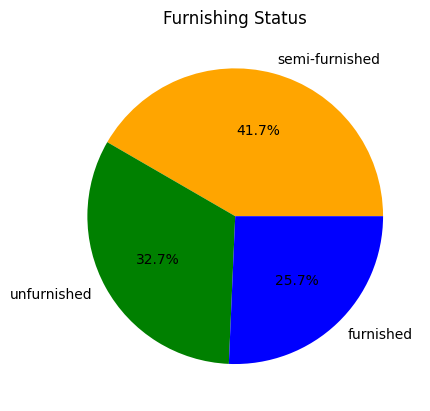

In [ ]:
counts=df['furnishing_status'].value_counts()
print(counts)
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=['orange','green','blue'])
plt.title('Furnishing Status')
plt.show()

**Interpretation of the Pie Chart (Furnishing Status):**

	•	The largest share of houses are semi-furnished (41.7%), indicating that most properties come with basic fittings but not complete interiors.
	•	Unfurnished houses (32.7%) form the second-largest group, suggesting a significant preference or availability for homes where buyers customize interiors themselves.
	•	Fully furnished houses (25.7%) make up the smallest proportion, showing that ready-to-move-in homes are comparatively less common.

**Overall Insight:** The housing market is dominated by semi-furnished and unfurnished properties, implying flexibility for buyers and cost-conscious offerings, while fully furnished homes are relatively limited.

main_road_access
yes    468
no      77
Name: count, dtype: int64


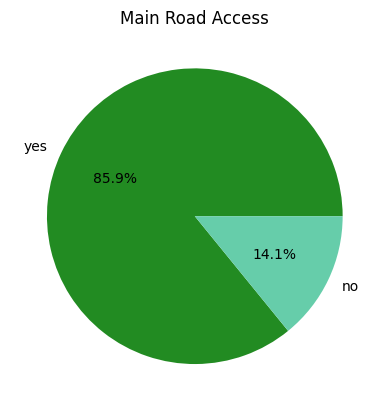

In [ ]:
counts=df['main_road_access'].value_counts()
print(counts)
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=['forestgreen','mediumaquamarine'])
plt.title('Main Road Access')
plt.show()

**Interpretation of the Pie Chart (Main Road Access):**

	•	A large majority of houses (85.9%) have direct access to a main road, indicating good connectivity for most properties.
	•	Only 14.1% of houses do not have main road access, making them a relatively small segment.

**Overall Insight:** Main road connectivity is a common feature in the dataset, suggesting that accessibility and ease of transportation are key characteristics of the housing market represented.

preferred_area
no     417
yes    128
Name: count, dtype: int64


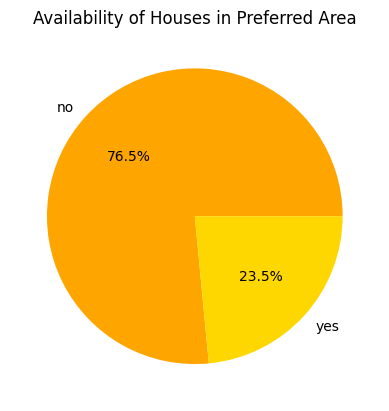

In [ ]:
counts=df['preferred_area'].value_counts()
print(counts)
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=['orange','gold'])
plt.title('Availability of Houses in Preferred Area')
plt.show()

**Interpretation of the Pie Chart (Availability of Houses in Preferred Area):**

	•	A majority of houses (76.5%) are not located in preferred areas, indicating limited availability in high-demand or prime locations.
	•	Only 23.5% of houses fall within preferred areas, making them a smaller and potentially more competitive segment.

**Overall Insight:** Houses in preferred areas are relatively scarce, which may contribute to higher demand and pricing pressure for properties in these locations.

guestroom
no     448
yes     97
Name: count, dtype: int64


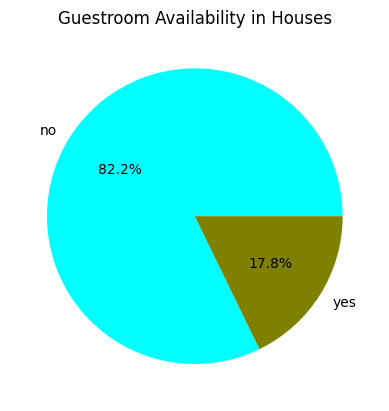

In [ ]:
counts=df['guestroom'].value_counts()
print(counts)
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=['aqua','olive'])
plt.title('Guestroom Availability in Houses')
plt.show()

**Interpretation of the Pie Chart (Guestroom Availability in Houses):**

	•	A large majority of houses (82.2%) do not have a guestroom, indicating that this feature is uncommon in the dataset.
	•	Only 17.8% of houses include a guestroom, making it a relatively rare amenity.

**Overall Insight:**
Guestrooms are not a standard feature in most houses, suggesting they may be considered a premium or optional addition rather than a basic requirement.

basement_availability
no     354
yes    191
Name: count, dtype: int64


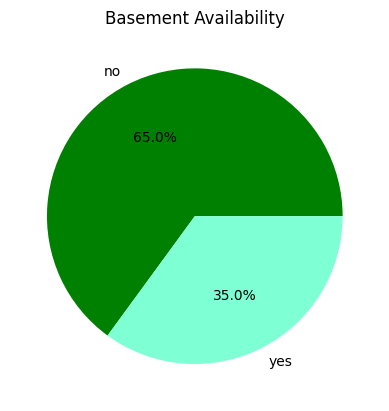

In [ ]:
counts=df['basement_availability'].value_counts()
print(counts)
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=['green','aquamarine'])
plt.title('Basement Availability')
plt.show()

**Interpretation of the Pie Chart (Basement Availability):**

	•	A majority of houses (65.0%) do not have a basement, showing that basements are not a common feature.
	•	35.0% of houses do include a basement, representing a sizable but minority segment.

**Overall Insight:**
While most houses lack basements, a significant proportion do have them, suggesting basements are a valued but non-essential feature in this housing market.

hot_water_heating
no     520
yes     25
Name: count, dtype: int64


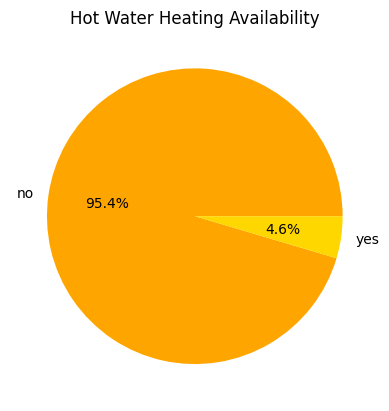

In [ ]:
counts=df['hot_water_heating'].value_counts()
print(counts)
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=['orange','gold'])
plt.title('Hot Water Heating Availability')
plt.show()

**Interpretation of the Pie Chart (Hot Water Heating Availability):**

	•	An overwhelming majority of houses (95.4%) do not have hot water heating, indicating this feature is extremely rare in the dataset.
	•	Only 4.6% of houses have hot water heating, making it a niche or premium amenity.

**Overall Insight:**
Hot water heating is not a standard facility in most houses, suggesting limited adoption, possibly due to cost, climate considerations, or market preferences.

air_conditioning
no     373
yes    172
Name: count, dtype: int64


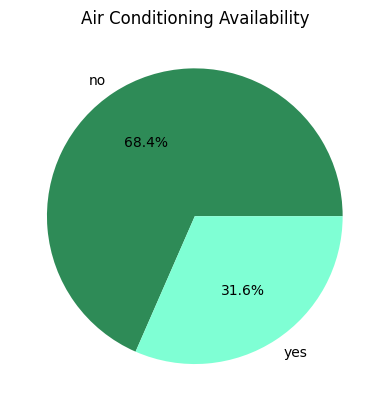

In [ ]:
count=df['air_conditioning'].value_counts()
print(count)
plt.pie(count,labels=count.index,autopct='%1.1f%%',colors=['seagreen','aquamarine'])
plt.title('Air Conditioning Availability')
plt.show()

**Interpretation of the Pie Chart (Air Conditioning Availability):**

	•	A majority of houses (68.4%) do not have air conditioning, indicating that AC is not a standard feature for most properties.
	•	31.6% of houses are equipped with air conditioning, representing a significant minority.

**Overall Insight:** While most houses lack air conditioning, nearly one-third do have it, suggesting AC is a valued comfort feature but not universally available in the housing market.

number of parking spaces
0    299
1    126
2    108
3     12
Name: count, dtype: int64


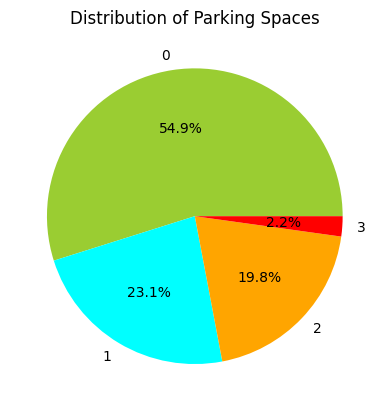

In [ ]:
count=df['number of parking spaces'].value_counts()
print(count)
plt.pie(count,labels=count.index,autopct='%1.1f%%',colors=['yellowgreen','aqua','orange','red'])
plt.title('Distribution of Parking Spaces')
plt.show()

number of bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


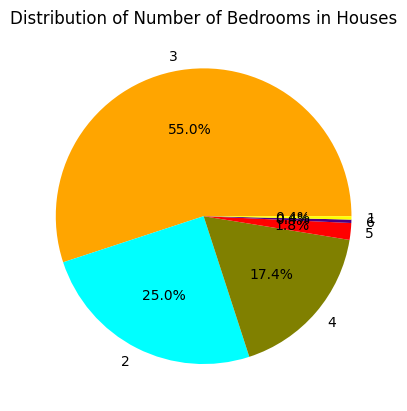

In [ ]:
count=df['number of bedrooms'].value_counts()
print(count)
plt.pie(count,labels=count.index,autopct='%1.1f%%',colors=['orange','cyan','olive','red','indigo','yellow'])
plt.title('Distribution of Number of Bedrooms in Houses')
plt.show()

**Interpretation of the Pie Chart (Distribution of Number of Bedrooms):**

	•	The majority of houses (55.0%) have 3 bedrooms, making this the most common house configuration.
	•	2-bedroom houses (25.0%) form the second-largest group, indicating strong demand or availability for smaller families.
	•	4-bedroom houses (17.4%) represent a notable but smaller segment.
	•	Houses with 1, 5, or 6 bedrooms account for only a very small proportion, showing that extreme sizes are rare.

**Overall Insight:** The housing market is dominated by mid-sized homes (2–3 bedrooms), reflecting practical living needs, while very small or very large houses are uncommon.

number of bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


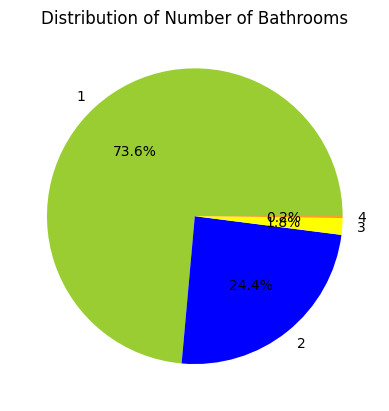

In [ ]:
count=df['number of bathrooms'].value_counts()
print(count)
plt.pie(count,labels=count.index,autopct='%1.1f%%',colors=['yellowgreen','blue','yellow','darkorange'])
plt.title('Distribution of Number of Bathrooms')
plt.show()

**Interpretation of the Pie Chart (Distribution of Number of Bathrooms):**

	•	A large majority of houses (73.6%) have 1 bathroom, indicating this is the standard configuration.
	•	24.4% of houses have 2 bathrooms, forming a significant minority.
	•	Houses with 3 or 4 bathrooms make up only a very small proportion, showing that multiple-bathroom homes are rare.

**Overall Insight:** Most houses are designed with basic bathroom facilities, while homes with more than two bathrooms are uncommon and likely positioned as premium properties.

number of stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


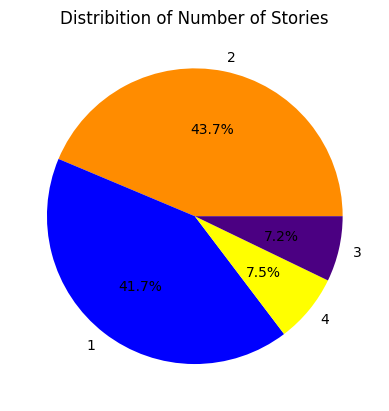

In [ ]:
count=df['number of stories'].value_counts()
print(count)
plt.pie(count,labels=count.index,autopct='%1.1f%%',colors=['darkorange','blue','yellow','indigo'])
plt.title('Distribition of Number of Stories')
plt.show()

**Interpretation of the Pie Chart (Distribution of Number of Stories):**

	•	2-storey houses (43.7%) form the largest share, making them the most common type.
	•	1-storey houses (41.7%) are almost equally prevalent, indicating a strong presence of single-floor homes.
	•	Houses with 3 stories (7.2%) and 4 stories (7.5%) together make up a small fraction of the dataset.

**Overall Insight:** The housing market is largely dominated by low-rise buildings (1–2 stories), while taller residential structures are relatively uncommon.

number of parking spaces
0    299
1    126
2    108
3     12
Name: count, dtype: int64


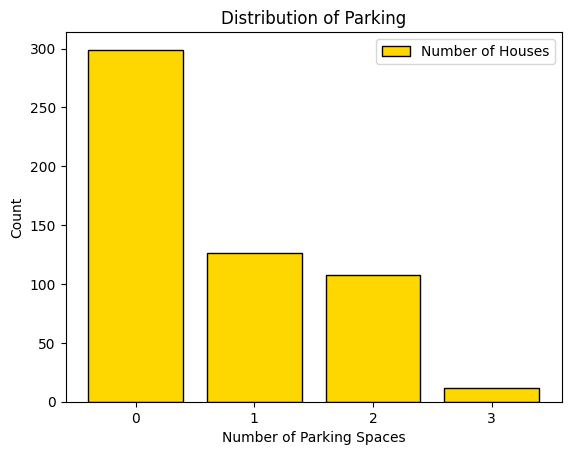

In [ ]:
count=df['number of parking spaces'].value_counts()
print(count)
plt.xlabel("Number of Parking Spaces")
plt.ylabel("Count")
plt.bar(count.index,count.values,color='gold',edgecolor='black',label='Number of Houses')
plt.legend()
plt.xticks([0,1,2,3])
plt.title('Distribution of Parking')
plt.show()

**Interpretation of the Bar Chart (Distribution of Parking Spaces):**

	•	The highest number of houses have 0 parking spaces, clearly dominating the distribution.
	•	Houses with 1 parking space form the second-largest group, followed by those with 2 parking spaces.
	•	Houses with 3 parking spaces are very few, indicating this is a rare feature.

**Overall Insight:**
Most houses in the dataset do not offer dedicated parking, and as the number of parking spaces increases, the number of houses decreases sharply. Parking availability beyond one or two spaces appears to be a premium characteristic.

number of stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


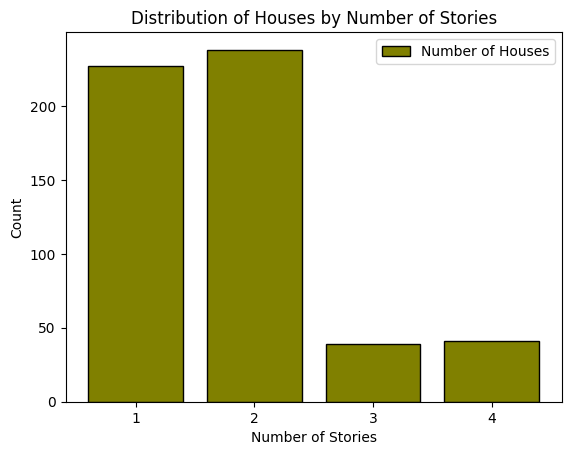

In [ ]:
count=df['number of stories'].value_counts()
print(count)
plt.bar(count.index,count.values,color='olive',edgecolor='black',label='Number of Houses')
plt.legend(loc='upper right')
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.xticks([1,2,3,4])
plt.title('Distribution of Houses by Number of Stories')
plt.show()

**Interpretation of the Bar Chart (Distribution of Houses by Number of Stories):**

	•	Houses with 2 stories are the most common, having the highest count in the dataset.
	•	1-storey houses are almost equally prevalent, showing a strong preference for low-rise housing.
	•	Houses with 3 or 4 stories are much fewer in number, indicating that taller residential buildings are relatively rare.

**Overall Insight:**
The housing stock is heavily concentrated in 1–2 storey houses, while multi-storey (3+ floors) houses form only a small portion of the market.

number of bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


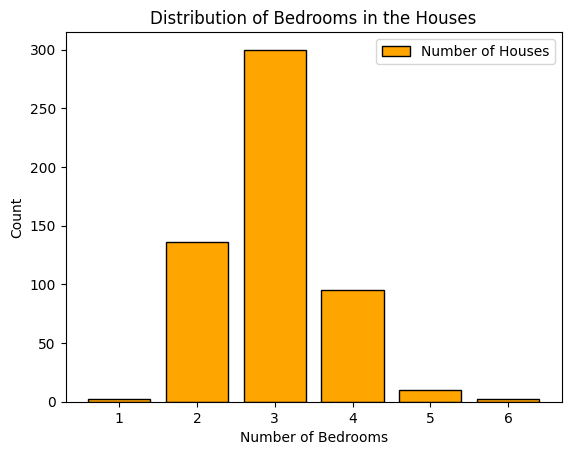

In [ ]:
count=df['number of bedrooms'].value_counts()
print(count)
plt.bar(count.index,count.values,color='orange',edgecolor='black',label='Number of Houses')
plt.legend(loc='upper right')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms in the Houses')
plt.show()

**Interpretation of the Bar Chart (Distribution of Bedrooms in Houses):**

	•	3-bedroom houses have the highest count, making them the most common type.
	•	2-bedroom houses are the second most prevalent, followed by 4-bedroom houses.
	•	Houses with 1, 5, or 6 bedrooms are very few, indicating these configurations are rare.

**Overall Insight:**
The dataset is dominated by mid-sized homes (2–3 bedrooms), reflecting typical family housing needs, while very small and very large houses form only a minor share of the market.

number of bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


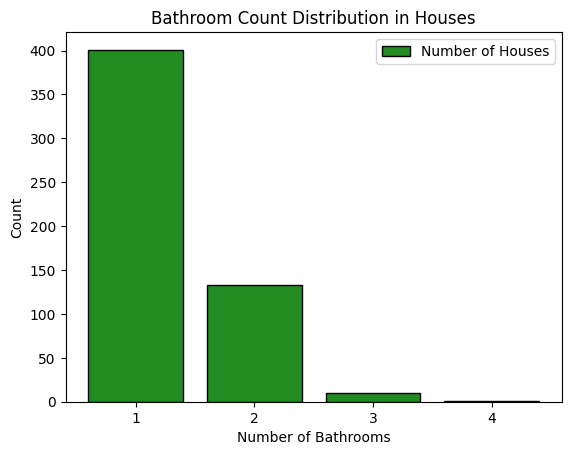

In [ ]:
count=df['number of bathrooms'].value_counts()
print(count)
plt.title('Bathroom Count Distribution in Houses')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.xticks([1,2,3,4])
plt.bar(count.index,count.values,color='forestgreen',edgecolor='black',label='Number of Houses')
plt.legend()
plt.show()

**Interpretation of the Bar Chart (Bathroom Count Distribution):**

	•	Houses with 1 bathroom dominate the dataset, having the highest count by a large margin.
	•	2-bathroom houses form a significant but much smaller group.
	•	Houses with 3 or 4 bathrooms are very rare.

**Overall Insight:**
Most houses are designed with basic bathroom facilities, and as the number of bathrooms increases, the number of houses drops sharply. Multiple-bathroom homes appear to be premium and uncommon in this housing market.

number of parking spaces
0    299
1    126
2    108
3     12
Name: count, dtype: int64


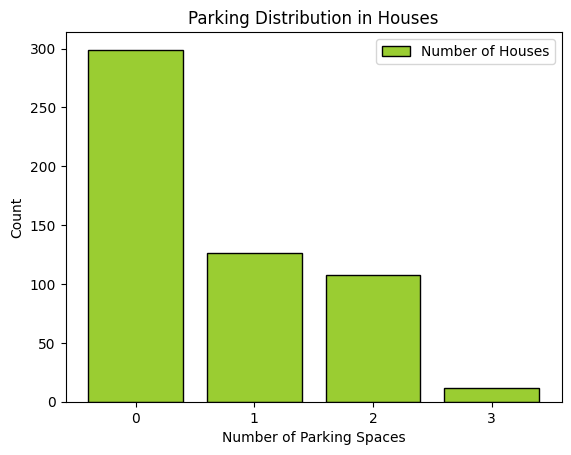

In [ ]:
count=df['number of parking spaces'].value_counts()
print(count)
plt.title('Parking Distribution in Houses')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Count')
plt.xticks([0,1,2,3])
plt.bar(count.index,count.values,color='yellowgreen',edgecolor='black',label='Number of Houses')
plt.legend()
plt.show()

**Interpretation of the Bar Chart (Parking Distribution in Houses):**

	•	Houses with 0 parking spaces are the most common, with the highest count in the dataset.
	•	Houses offering 1 parking space are the next most frequent, followed by those with 2 parking spaces.
	•	Houses with 3 parking spaces are very rare.

**Overall Insight:**
Parking availability is limited for most houses, and the number of houses decreases steadily as parking spaces increase. Multiple parking spaces are a premium and uncommon feature in this housing market.

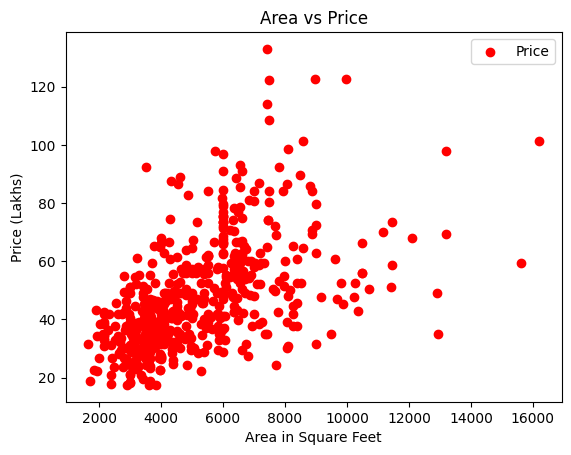

In [ ]:
x=df['area_in_sqft']
y=df['prices_in_lakhs']
plt.xlabel('Area in Square Feet')
plt.ylabel('Price (Lakhs)')
plt.title('Area vs Price')
plt.scatter(x,y,color='red',marker='o',label='Price')
plt.legend()
plt.show()

**Interpretation of the Scatter Plot (Area vs Price):**

	•	There is a clear positive relationship between area (in square feet) and price (in lakhs)—as the area increases, house prices generally rise.
	•	Most houses are concentrated in the lower to mid area range, with corresponding prices clustered in the lower to mid price range.
	•	A few points at very large areas and high prices indicate outliers or premium properties.
	•	Some variation in price is visible for similar area sizes, suggesting that other factors (location, amenities, furnishing, etc.) also influence price.

**Overall Insight:**
While area is a strong driver of house price, it is not the only factor—pricing varies within the same area range due to additional property characteristics.

main_road_access
no     33.989045
yes    49.917773
Name: prices_in_lakhs, dtype: float64


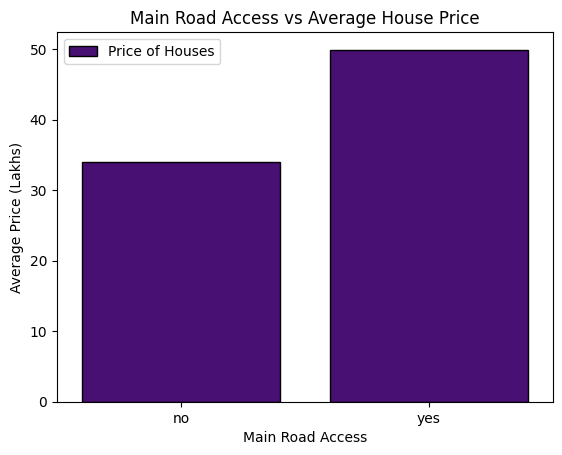

In [ ]:
a=df.groupby('main_road_access',observed=False)['prices_in_lakhs'].mean()
print(a)
x=df['main_road_access']
y=df['prices_in_lakhs']
plt.xlabel('Main Road Access')
plt.ylabel('Average Price (Lakhs)')
plt.title('Main Road Access vs Average House Price')
sns.barplot(x='main_road_access',y='prices_in_lakhs',color='indigo',label='Price of Houses',data=df,edgecolor='black',errorbar=None)
plt.legend(loc='upper left')
plt.show()

**Interpretation of the Bar Chart (Main Road Access vs Average House Price):**

	•	Houses with main road access have a higher average price (around 50 lakhs) compared to houses without main road access (around 34 lakhs).
	•	The noticeable price gap highlights the importance of connectivity and accessibility in property valuation.

**Overall Insight:**
Main road access significantly increases house prices, indicating that better location and ease of transportation are key value drivers in the housing market.

air_conditioning
no     41.919397
yes    60.132206
Name: prices_in_lakhs, dtype: float64


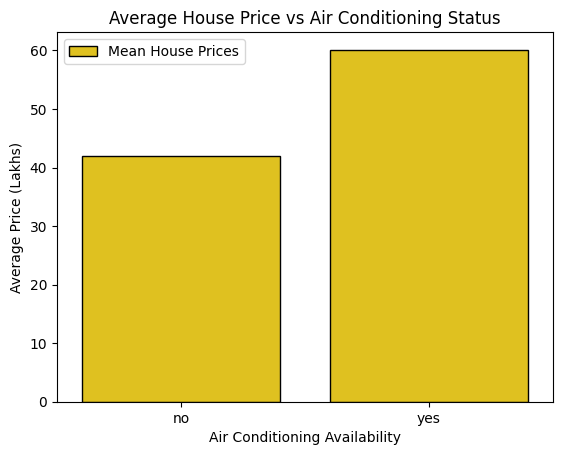

In [ ]:
a=df.groupby('air_conditioning',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Air Conditioning Availability')
sns.barplot(x='air_conditioning', y='prices_in_lakhs', data=df, estimator='mean',label="Mean House Prices",color='gold',edgecolor='black',errorbar=None)
plt.ylabel('Average Price (Lakhs)')
plt.title('Average House Price vs Air Conditioning Status')
plt.legend()
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Air Conditioning Status):**

	•	Houses with air conditioning have a significantly higher average price (around 60 lakhs) compared to houses without air conditioning (around 42 lakhs).
	•	The price difference indicates a clear premium associated with air conditioning.

**Overall Insight:**
Air conditioning is strongly linked with higher-priced houses, suggesting it is a value-adding amenity and often present in more premium or better-equipped properties.

number of bedrooms
1    27.125000
2    36.320221
3    49.545981
4    57.297579
5    58.198000
6    47.915000
Name: prices_in_lakhs, dtype: float64


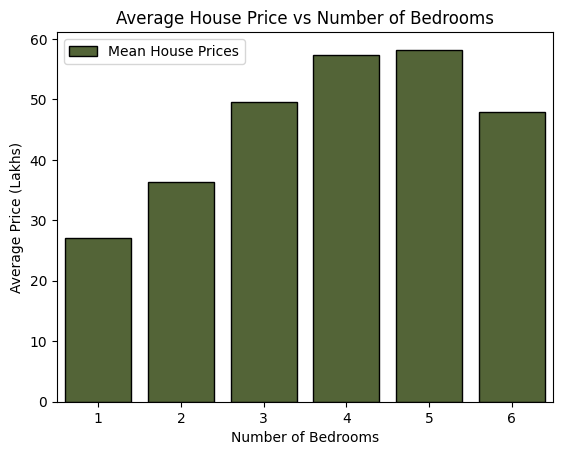

In [ ]:
a=df.groupby('number of bedrooms',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (Lakhs)')
sns.barplot(x='number of bedrooms',y='prices_in_lakhs',data=df,color='darkolivegreen',errorbar=None,edgecolor='black',label='Mean House Prices')
plt.legend(loc='upper left')
plt.title('Average House Price vs Number of Bedrooms')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Number of Bedrooms):**

	•	Average house price increases steadily from 1 to 5 bedrooms, showing a strong positive relationship between the number of bedrooms and price.
	•	1-bedroom houses have the lowest average price, while 4–5 bedroom houses command the highest prices.
	•	The slight drop in average price for 6-bedroom houses may be due to a very small sample size or variability in property types.

**Overall insight:**
The number of bedrooms is a key determinant of house price, with larger homes generally being more expensive. However, extreme categories (like 6 bedrooms) may not follow the trend perfectly due to limited data points.

furnishing_status
furnished         54.956960
semi-furnished    49.075242
unfurnished       40.138315
Name: prices_in_lakhs, dtype: float64


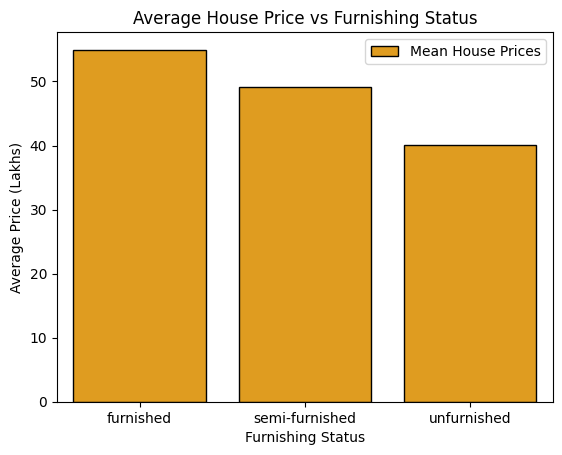

In [ ]:
a=df.groupby('furnishing_status',observed=False)['prices_in_lakhs'].mean()
print(a)
sns.barplot(x='furnishing_status',y='prices_in_lakhs',data=df,color='orange',edgecolor='black',label='Mean House Prices',errorbar=None)
plt.xlabel('Furnishing Status')
plt.ylabel('Average Price (Lakhs)')
plt.legend(loc='upper right')
plt.title('Average House Price vs Furnishing Status')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Furnishing Status):**

	•	Fully furnished houses have the highest average price (around 55 lakhs), reflecting the premium for ready-to-move-in homes.
	•	Semi-furnished houses are moderately priced (around 49 lakhs), positioned between furnished and unfurnished properties.
	•	Unfurnished houses have the lowest average price (around 40 lakhs).

Overall Insight:
House prices increase with the level of furnishing. Furnishing status is a significant value driver, with better-furnished homes commanding higher prices due to added convenience and reduced setup costs for buyers.

guestroom
no     45.445456
yes    57.928969
Name: prices_in_lakhs, dtype: float64


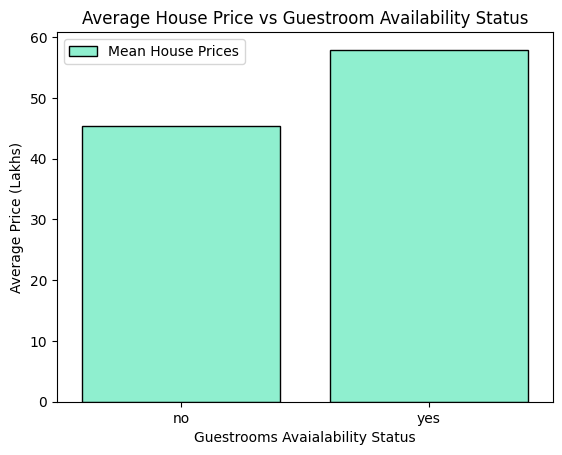

In [ ]:
a=df.groupby('guestroom',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Guestrooms Avaialability Status')
plt.ylabel('Average Price (Lakhs)')
plt.title('Average House Price vs Guestroom Availability Status')
sns.barplot(x='guestroom',y='prices_in_lakhs',data=df,color='aquamarine',edgecolor='black',label='Mean House Prices',errorbar=None)
plt.legend(loc='upper left')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Guestroom Availability Status):**

	•	Houses with a guestroom have a higher average price (around 58 lakhs) compared to houses without a guestroom (around 45 lakhs).
	•	The presence of a guestroom is associated with a clear price premium.

**Overall Insight:**
Guestroom availability adds value to a house and is typically found in larger or more premium properties, contributing to higher average prices.

basement_availability
no     45.099659
yes    52.426152
Name: prices_in_lakhs, dtype: float64


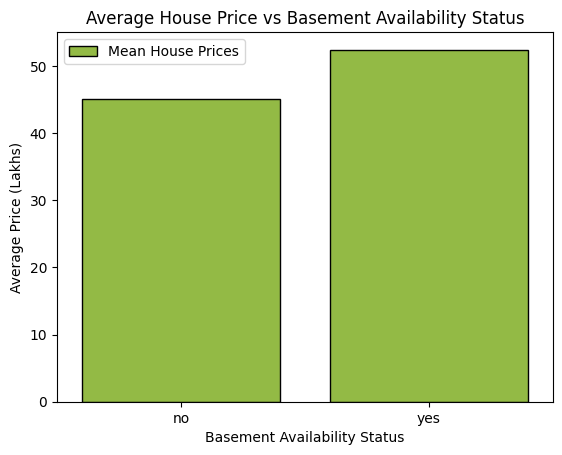

In [ ]:
a=df.groupby('basement_availability',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Basement Availability Status')
plt.ylabel('Average Price (Lakhs)')
plt.title('Average House Price vs Basement Availability Status')
sns.barplot(x='basement_availability',y='prices_in_lakhs',data=df,color='yellowgreen',edgecolor='black',label='Mean House Prices',errorbar=None)
plt.legend(loc='upper left')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Basement Availability Status):**

	•	Houses with a basement have a higher average price (around 52 lakhs) compared to houses without a basement (around 45 lakhs).
	•	The difference indicates a price premium associated with basement availability.

**Overall Insight:**
Basements add functional space and value to a property, and their presence is typically linked with larger or higher-end houses, leading to higher average prices.

hot_water_heating
no     47.285932
yes    55.599600
Name: prices_in_lakhs, dtype: float64


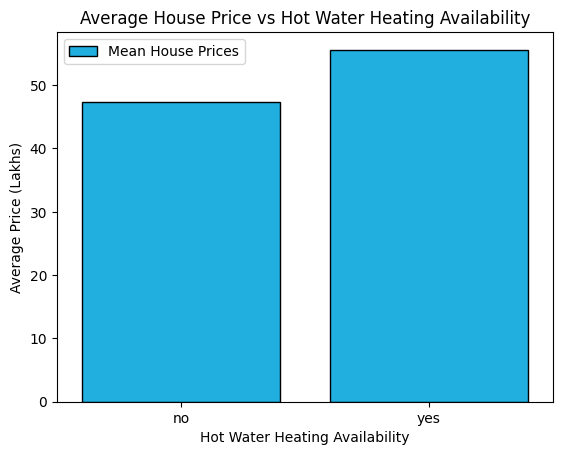

In [ ]:
a=df.groupby('hot_water_heating',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Hot Water Heating Availability')
plt.ylabel('Average Price (Lakhs)')
plt.title('Average House Price vs Hot Water Heating Availability')
sns.barplot(x='hot_water_heating',y='prices_in_lakhs',data=df,color='deepskyblue',edgecolor='black',label='Mean House Prices',errorbar=None)
plt.legend(loc='upper left')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Hot Water Heating Availability):**

	•	Houses with hot water heating have a higher average price (around 55 lakhs) compared to houses without hot water heating (around 47 lakhs).
	•	This indicates a noticeable price premium for houses equipped with this facility.

**Overall Insight:**
Hot water heating, though rare in the dataset, is associated with higher-priced and better-equipped houses, suggesting it is considered a premium amenity in the housing market.

preferred_area
no     44.252988
yes    58.790457
Name: prices_in_lakhs, dtype: float64


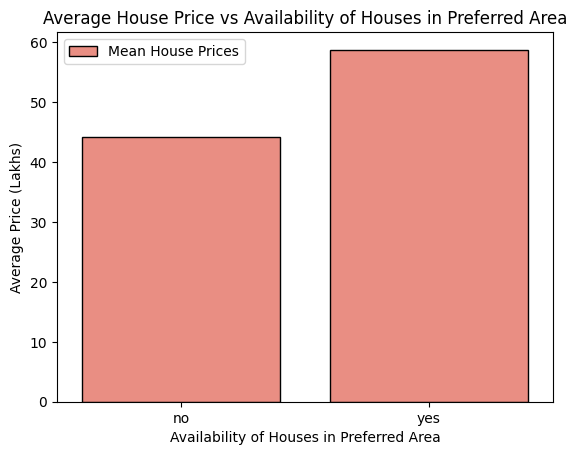

In [ ]:
a=df.groupby('preferred_area',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Availability of Houses in Preferred Area')
plt.ylabel('Average Price (Lakhs)')
plt.title('Average House Price vs Availability of Houses in Preferred Area')
sns.barplot(x='preferred_area',y='prices_in_lakhs',data=df,color='salmon',edgecolor='black',label='Mean House Prices',errorbar=None)
plt.legend(loc='upper left')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Availability in Preferred Area):**

	•	Houses located in preferred areas have a significantly higher average price (around 59 lakhs) compared to houses not in preferred areas (around 44 lakhs).
	•	The clear price difference highlights the strong influence of location on property value.

**Overall Insight:**
Being situated in a preferred area is one of the most impactful factors on house price, reinforcing that location plays a critical role in determining real estate prices.

number of parking spaces
0    41.360167
1    51.903889
2    58.963281
3    58.671667
Name: prices_in_lakhs, dtype: float64


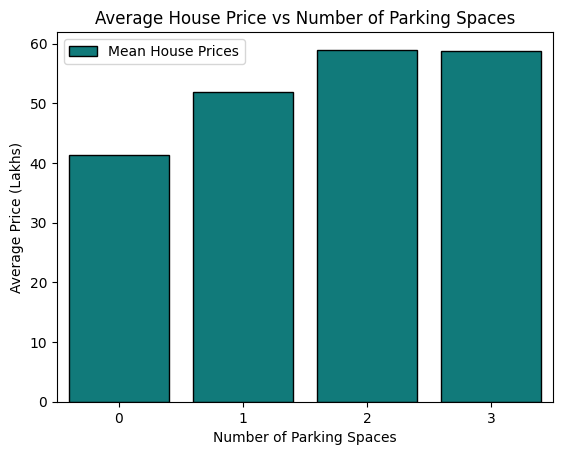

In [ ]:
a=df.groupby('number of parking spaces',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Average Price (Lakhs)')
plt.title('Average House Price vs Number of Parking Spaces')
sns.barplot(x='number of parking spaces',y='prices_in_lakhs',data=df,color='darkcyan',edgecolor='black',label='Mean House Prices',errorbar=None)
plt.legend(loc='upper left')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Availability in Preferred Area):**

	•	Houses located in preferred areas have a significantly higher average price (around 59 lakhs) compared to houses not in preferred areas (around 44 lakhs).
	•	The clear price difference highlights the strong influence of location on property value.

**Overall Insight:**
Being situated in a preferred area is one of the most impactful factors on house price, reinforcing that location plays a critical role in determining real estate prices.

number of stories
1    41.706586
2    47.640735
3    56.854359
4    72.084498
Name: prices_in_lakhs, dtype: float64


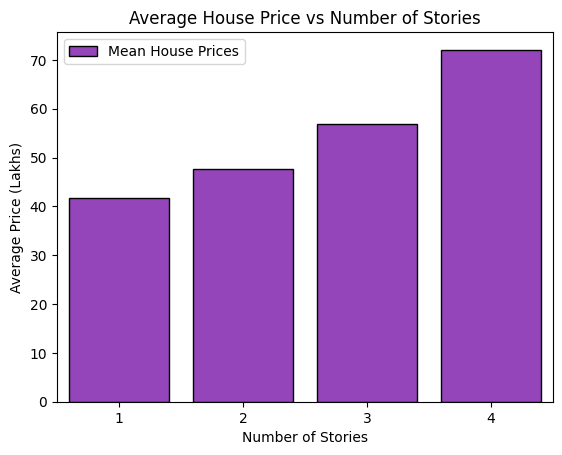

In [ ]:
a=df.groupby('number of stories',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Number of Stories')
plt.ylabel('Average Price (Lakhs)')
plt.title('Average House Price vs Number of Stories')
sns.barplot(x='number of stories',y='prices_in_lakhs',data=df,color='darkorchid',edgecolor='black',label='Mean House Prices',errorbar=None)
plt.legend(loc='upper left')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Availability in Preferred Area):**

	•	Houses located in preferred areas have a significantly higher average price (around 59 lakhs) compared to houses not in preferred areas (around 44 lakhs).
	•	The clear price difference highlights the strong influence of location on property value.

**Overall Insight:**
Being situated in a preferred area is one of the most impactful factors on house price, reinforcing that location plays a critical role in determining real estate prices.

number of bathrooms
1     42.069127
2     62.092063
3     72.821000
4    122.500000
Name: prices_in_lakhs, dtype: float64


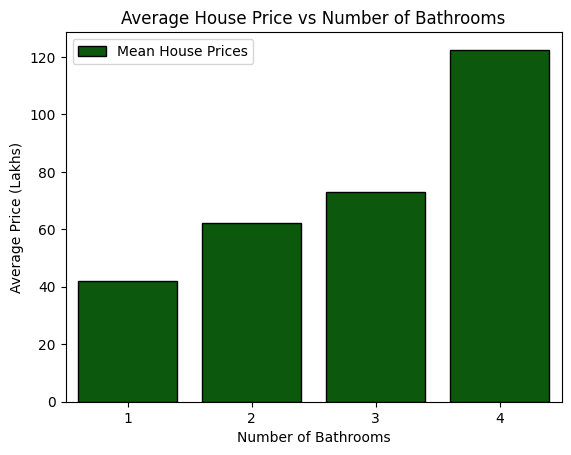

In [ ]:
a=df.groupby('number of bathrooms',observed=False)['prices_in_lakhs'].mean()
print(a)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price (Lakhs)')
plt.title('Average House Price vs Number of Bathrooms')
sns.barplot(x='number of bathrooms',y='prices_in_lakhs',data=df,color='darkgreen',edgecolor='black',label='Mean House Prices',errorbar=None)
plt.legend(loc='upper left')
plt.show()

**Interpretation of the Bar Chart (Average House Price vs Number of Bathrooms):**

	•	Average house price increases consistently as the number of bathrooms increases.
	•	Houses with 1 bathroom have the lowest average price (around 42 lakhs).
	•	2-bathroom houses show a substantial increase in price (around 62 lakhs).
	•	3-bathroom houses are priced even higher (around 73 lakhs).
	•	Houses with 4 bathrooms have a very high average price (above 120 lakhs), indicating a strong premium.

**Overall Insight:**
The number of bathrooms is a strong indicator of property value. More bathrooms are typically associated with larger, luxury homes, leading to significantly higher average prices, especially at the upper end.

prices_in_lakhs
42.0000    17
35.0000    17
49.0000    12
52.5000     9
56.0000     9
           ..
21.3500     1
19.6000     1
18.5500     1
18.2000     1
17.6715     1
Name: count, Length: 219, dtype: int64


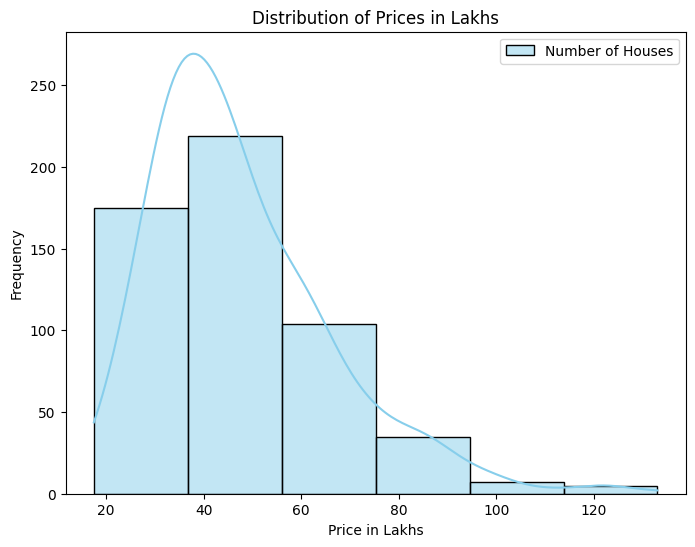

In [ ]:
count=df['prices_in_lakhs'].value_counts()
print(count)
plt.figure(figsize=(8,6))
sns.histplot(df['prices_in_lakhs'], kde=True, binwidth=20, color='skyblue',label='Number of Houses')
plt.legend(loc='upper right')
plt.title('Distribution of Prices in Lakhs')
plt.xlabel('Price in Lakhs')
plt.ylabel('Frequency')
plt.show()

**Interpretation of the Histogram (Distribution of Prices in Lakhs):**

	•	Most house prices are concentrated in the lower to mid-price range, with the highest frequency roughly between 30–50 lakhs.
	•	The distribution is right-skewed, meaning there are fewer houses at very high prices.
	•	A small number of properties priced above 80–100 lakhs appear as high-value outliers.
	•	The smooth curve indicates a single main peak, suggesting a dominant typical price range in the market.

**Overall Insight:**
The housing market is largely composed of affordable to mid-range properties, while premium and luxury houses form a small but important segment that extends the price distribution to the right.

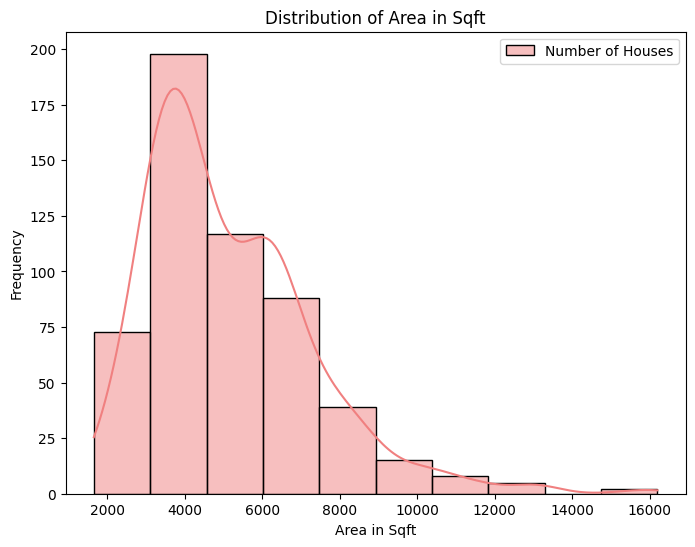

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['area_in_sqft'], kde=True, binwidth=1500, color='lightcoral',label='Number of Houses')
plt.legend(loc='upper right')
plt.title('Distribution of Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Frequency')
plt.show()

**Interpretation of the Histogram (Distribution of Area in Sqft):**

	•	Most houses fall within the lower to mid area range, with a strong concentration around 3,000–5,000 sqft.
	•	The distribution is right-skewed, indicating that while most homes are moderately sized, a few very large houses exist.
	•	Properties with areas above 8,000–10,000 sqft are relatively rare and appear as outliers.
	•	The smooth curve shows a single dominant peak, representing the most common house size in the dataset.

**Overall Insight:**
The housing market primarily consists of medium-sized homes, while very large properties form a small premium segment that extends the distribution to the right.

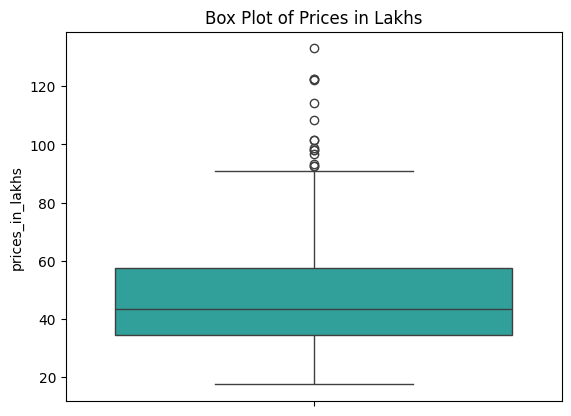

In [ ]:
sns.boxplot(y=df['prices_in_lakhs'],color='lightseagreen')
plt.title('Box Plot of Prices in Lakhs')
plt.show()

**Interpretation of the Histogram (Distribution of Area in Sqft):**

	•	Most houses fall within the lower to mid area range, with a strong concentration around 3,000–5,000 sqft.
	•	The distribution is right-skewed, indicating that while most homes are moderately sized, a few very large houses exist.
	•	Properties with areas above 8,000–10,000 sqft are relatively rare and appear as outliers.
	•	The smooth curve shows a single dominant peak, representing the most common house size in the dataset.

**Overall Insight:**
The housing market primarily consists of medium-sized homes, while very large properties form a small premium segment that extends the distribution to the right.

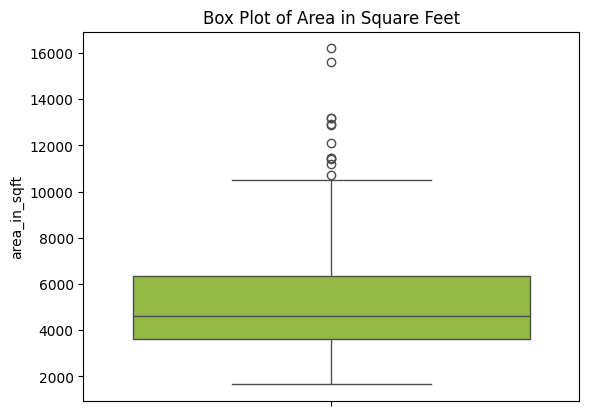

In [ ]:
sns.boxplot(y=df['area_in_sqft'],color='yellowgreen')
plt.title('Box Plot of Area in Square Feet')
plt.yticks(fontsize=10)
plt.show()

Interpretation of Box Plot (Area in Square Feet):

	•	Most houses fall within the lower to mid area range, with a strong concentration around 3,000–5,000 sqft.
	•	The distribution is right-skewed, indicating that while most homes are moderately sized, a few very large houses exist.
	•	Properties with areas above 8,000–10,000 sqft are relatively rare and appear as outliers.
	•	The smooth curve shows a single dominant peak, representing the most common house size in the dataset.

**Overall Insight:**
The housing market primarily consists of medium-sized homes, while very large properties form a small premium segment that extends the distribution to the right.

number of bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


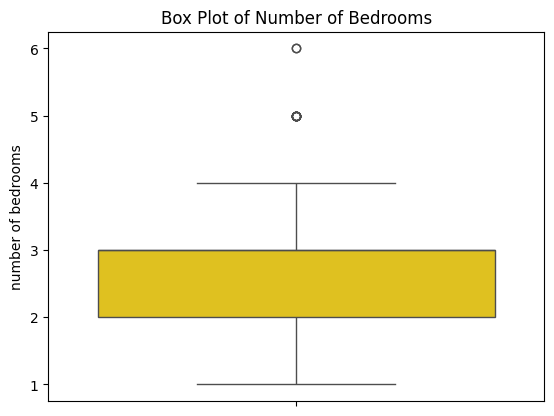

In [ ]:
count=df['number of bedrooms'].value_counts()
print(count)
sns.boxplot(y=df['number of bedrooms'],color='gold')
plt.title('Box Plot of Number of Bedrooms')
plt.yticks(fontsize=10)
plt.show()

**Interpretation of the Box Plot (Number of Bedrooms):**

	•	The median number of bedrooms is 3, indicating that a typical house has three bedrooms.
	•	The interquartile range (IQR) lies between 2 and 3 bedrooms, showing that most houses are clustered around these values.
	•	The lower whisker reaches 1 bedroom, representing smaller homes.
	•	Outliers at 5 and 6 bedrooms indicate a few very large houses that are uncommon in the dataset.

**Overall Insight:**
The housing market is strongly centered around 2–3 bedroom homes, while houses with a high number of bedrooms are rare and fall into a premium or exceptional category.

number of bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


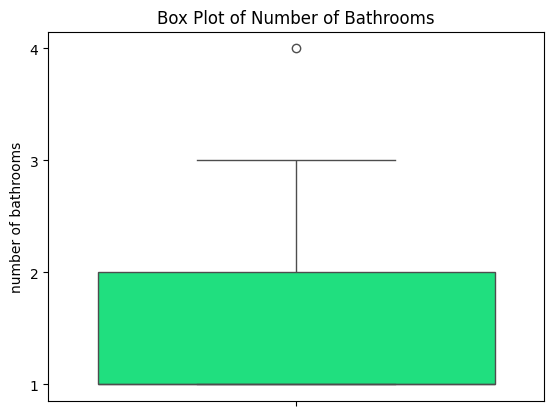

In [ ]:
count=df['number of bathrooms'].value_counts()
print(count)
sns.boxplot(y=df['number of bathrooms'],color='springgreen')
plt.title('Box Plot of Number of Bathrooms')
plt.yticks([1,2,3,4])
plt.yticks(fontsize=10)
plt.show()

**Interpretation of the Box Plot (Number of Bedrooms):**

	•	The median number of bedrooms is 3, indicating that a typical house has three bedrooms.
	•	The interquartile range (IQR) lies between 2 and 3 bedrooms, showing that most houses are clustered around these values.
	•	The lower whisker reaches 1 bedroom, representing smaller homes.
	•	Outliers at 5 and 6 bedrooms indicate a few very large houses that are uncommon in the dataset.

**Overall Insight:**
The housing market is strongly centered around 2–3 bedroom homes, while houses with a high number of bedrooms are rare and fall into a premium or exceptional category.

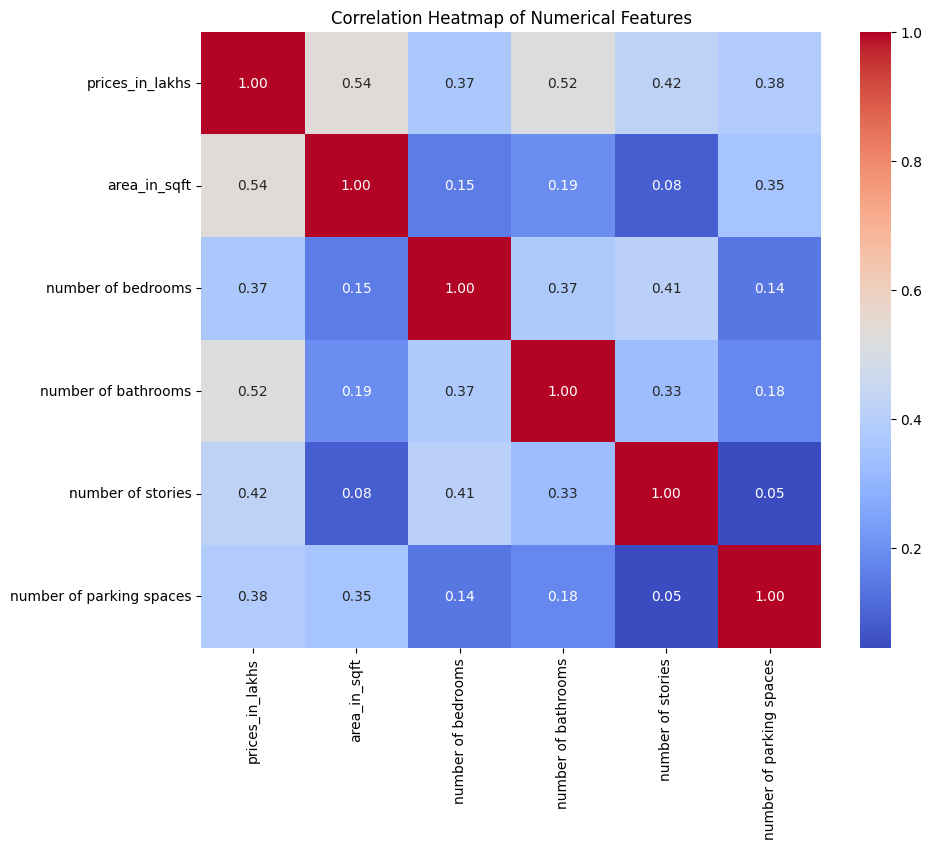

In [ ]:
numerical_df = df[['prices_in_lakhs', 'area_in_sqft', 'number of bedrooms', 'number of bathrooms', 'number of stories', 'number of parking spaces']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Interpretation of the Correlation Heatmap (Numerical Features):**

	•	Price (prices_in_lakhs) shows the strongest positive correlation with area (0.54) and bathrooms (0.52), indicating these are the most influential numerical factors affecting house price.
	•	Stories (0.42) and parking (0.38) also have a moderate positive correlation with price, suggesting added value with more floors and parking spaces.
	•	Bedrooms (0.37) have a moderate relationship with price, but weaker than area and bathrooms.

**Inter-feature relationships:**

	•	Bedrooms and stories (0.41) and bedrooms and bathrooms (0.37) are moderately correlated, which is expected as larger houses tend to have more rooms and floors.
	•	Area vs parking (0.35) shows a moderate correlation, implying larger houses usually offer more parking.
	•	Very weak correlations such as stories vs parking (0.05) and area vs stories (0.08) indicate little direct relationship.

**Overall Insight:**
House prices are most strongly driven by size-related features (area, bathrooms), followed by structural and convenience features (stories, parking). No extremely high correlations (>0.8) are present, suggesting multicollinearity is low and features contribute independently to price variation.

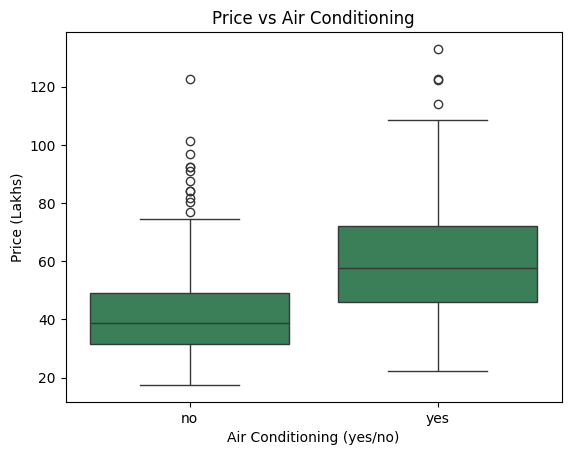

In [ ]:
sns.boxplot(x=df['air_conditioning'], y=df['prices_in_lakhs'],color='seagreen')
plt.title("Price vs Air Conditioning")
plt.xlabel("Air Conditioning (yes/no)")
plt.ylabel("Price (Lakhs)")
plt.show()

**Interpretation of the Box Plot (Price vs Air Conditioning):**

	•	Houses with air conditioning have a higher median price compared to houses without air conditioning.
	•	The price distribution for AC-equipped houses is shifted upward, indicating generally higher prices across most of the range.
	•	Houses without AC show a lower median and a tighter spread, reflecting more mid-range pricing.
	•	High-price outliers are more prominent among houses with AC, suggesting that premium and luxury homes are more likely to include air conditioning.

**Overall Insight:**
Air conditioning is strongly associated with higher house prices. Properties with AC tend to belong to higher-value segments, reinforcing AC as a key premium amenity in the housing market.



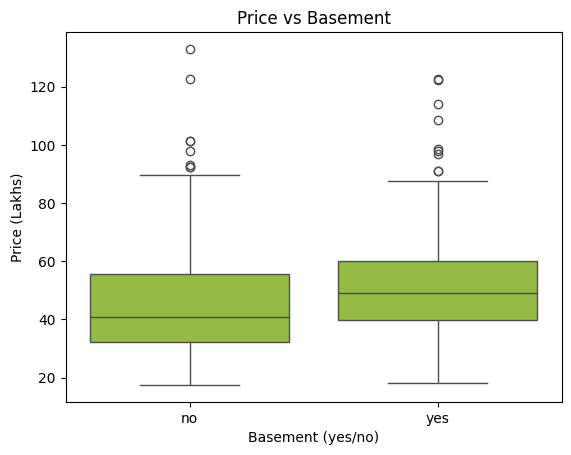

In [ ]:
sns.boxplot(x=df['basement_availability'], y=df['prices_in_lakhs'],color='yellowgreen')
plt.title("Price vs Basement")
plt.xlabel("Basement (yes/no)")
plt.ylabel("Price (Lakhs)")
plt.show()

**Interpretation of the Box Plot (Price vs Basement):**

	•	Houses with a basement have a higher median price compared to houses without a basement.
	•	The price distribution for basement houses is shifted upward, indicating generally higher values.
	•	Houses without basements show a lower median price and slightly tighter spread.
	•	High-price outliers are present in both categories, but premium properties are more common among houses with basements.

**Overall Insight:**
Basement availability is associated with higher house prices, suggesting that basements add functional space and are typically found in larger or higher-end properties.

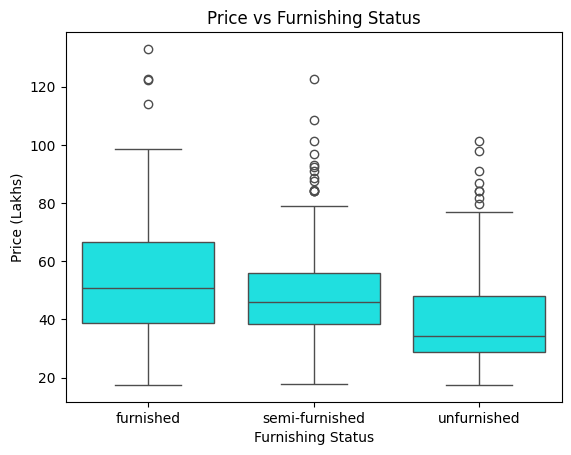

In [ ]:
sns.boxplot(x=df['furnishing_status'], y=df['prices_in_lakhs'],color='aqua')
plt.title("Price vs Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Price (Lakhs)")
plt.show()

**Interpretation of the Box Plot (Price vs Basement):**

	•	Houses with a basement have a higher median price compared to houses without a basement.
	•	The price distribution for basement houses is shifted upward, indicating generally higher values.
	•	Houses without basements show a lower median price and slightly tighter spread.
	•	High-price outliers are present in both categories, but premium properties are more common among houses with basements.

**Overall Insight:**
Basement availability is associated with higher house prices, suggesting that basements add functional space and are typically found in larger or higher-end properties.

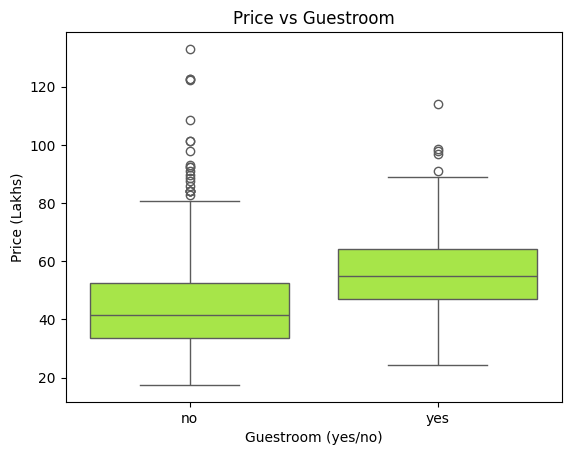

In [ ]:
sns.boxplot(x=df['guestroom'], y=df['prices_in_lakhs'],color='greenyellow')
plt.title("Price vs Guestroom")
plt.xlabel("Guestroom (yes/no)")
plt.ylabel("Price (Lakhs)")
plt.show()

**Interpretation of the Box Plot (Price vs Basement):**

	•	Houses with a basement have a higher median price compared to houses without a basement.
	•	The price distribution for basement houses is shifted upward, indicating generally higher values.
	•	Houses without basements show a lower median price and slightly tighter spread.
	•	High-price outliers are present in both categories, but premium properties are more common among houses with basements.

**Overall Insight:**
Basement availability is associated with higher house prices, suggesting that basements add functional space and are typically found in larger or higher-end properties.

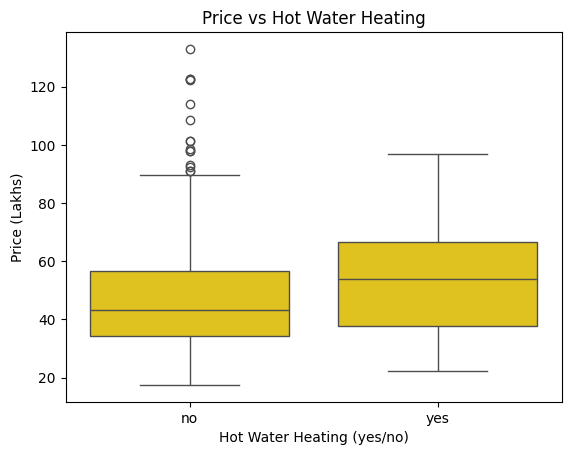

In [ ]:
sns.boxplot(x=df['hot_water_heating'],y=df['prices_in_lakhs'],color='gold')
plt.title("Price vs Hot Water Heating")
plt.xlabel("Hot Water Heating (yes/no)")
plt.ylabel("Price (Lakhs)")
plt.show()

**Interpretation of the Box Plot (Price vs Hot Water Heating):**

	•	Houses with hot water heating have a higher median price compared to houses without it.
	•	The price distribution for houses with hot water heating is shifted upward, indicating generally higher-priced properties.
	•	Houses without hot water heating show a lower median and a slightly narrower spread.
	•	High-price outliers appear in both groups, but are more common among houses with hot water heating.

**Overall Insight:**
Hot water heating is associated with higher house prices and is typically found in better-equipped or premium homes, reinforcing its role as a value-adding amenity.

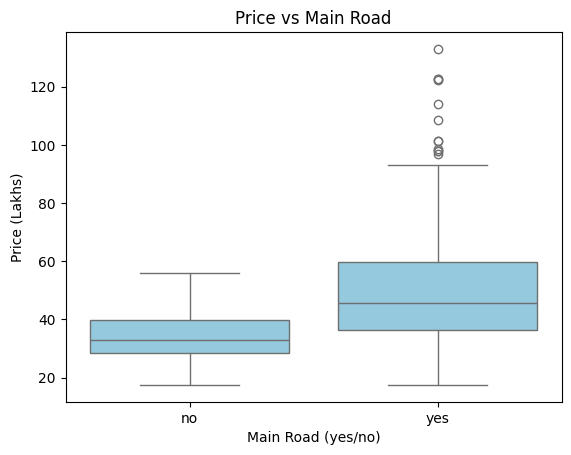

In [ ]:
sns.boxplot(x=df['main_road_access'],y=df['prices_in_lakhs'],color='skyblue')
plt.title('Price vs Main Road')
plt.xlabel('Main Road (yes/no)')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Box Plot (Price vs Main Road Access):**

	•	Houses with main road access have a higher median price compared to houses without main road access.
	•	The price distribution for main-road houses is shifted upward, indicating generally higher property values.
	•	Houses without main road access show lower median prices and a narrower spread.
	•	High-price outliers are more frequent among houses with main road access, suggesting that premium properties are often located on or near main roads.

**Overall Insight:**
Main road access has a strong positive impact on house prices, highlighting the importance of location and connectivity in determining property value.

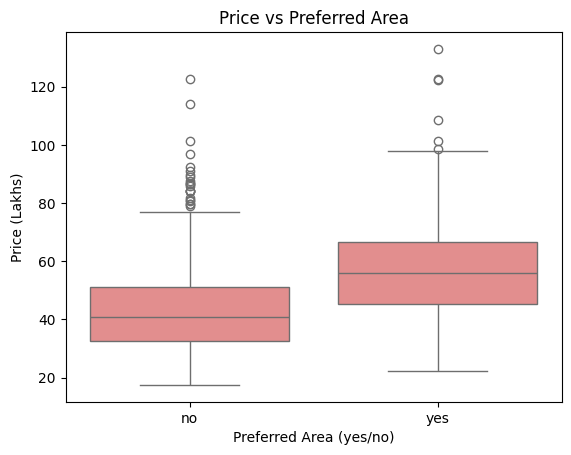

In [ ]:
sns.boxplot(x=df['preferred_area'],y=df['prices_in_lakhs'],color='lightcoral')
plt.title('Price vs Preferred Area')
plt.xlabel('Preferred Area (yes/no)')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Box Plot (Price vs Preferred Area):**

	•	Houses located in preferred areas have a higher median price compared to houses not in preferred areas.
	•	The price distribution for preferred-area houses is clearly shifted upward, indicating consistently higher property values.
	•	Houses outside preferred areas show lower median prices and a narrower price range.
	•	High-price outliers are more common among houses in preferred areas, reflecting the presence of premium and luxury properties.

**Overall Insight:**
Location in a preferred area is one of the strongest drivers of higher house prices, reinforcing the critical role of neighborhood desirability in real estate valuation.

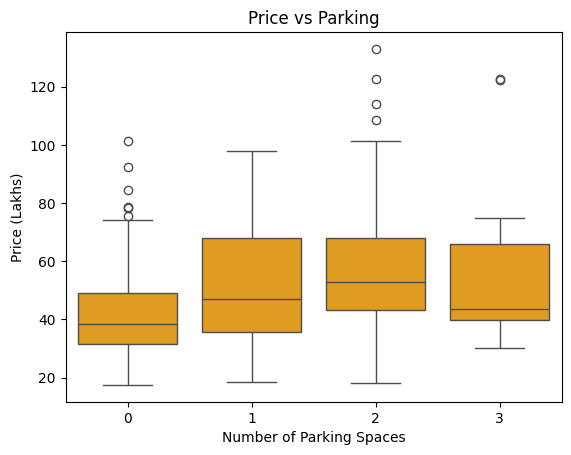

In [ ]:
sns.boxplot(x=df['number of parking spaces'],y=df['prices_in_lakhs'],color='orange')
plt.title('Price vs Parking')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Box Plot (Price vs Parking Spaces):**

	•	Houses with no parking (0) have the lowest median price, indicating limited parking reduces property value.
	•	The median price increases from 0 to 2 parking spaces, showing a positive relationship between parking availability and price.
	•	Houses with 2 parking spaces show the highest median price and wider variability, reflecting premium properties.
	•	For 3 parking spaces, the median price slightly dips or stabilizes, likely due to a small sample size.
	•	High-price outliers are more common in houses with 2 or 3 parking spaces, indicating luxury homes often provide more parking.

**Overall Insight:**
Parking availability positively influences house prices, but the effect plateaus beyond 2 spaces, suggesting diminishing returns or limited data at higher parking counts.

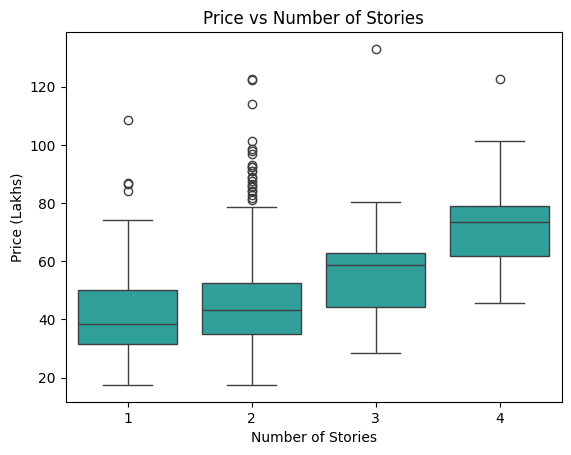

In [ ]:
sns.boxplot(x=df['number of stories'],y=df['prices_in_lakhs'],color='lightseagreen')
plt.title('Price vs Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Box Plot (Price vs Number of Stories):**

	•	The median house price increases steadily as the number of stories increases.
	•	1-storey houses have the lowest median prices, followed by 2-storey houses.
	•	3-storey houses show a clear jump in median price, while 4-storey houses have the highest median prices.
	•	Price variability also increases with the number of stories, and high-price outliers are more common in taller houses.

**Overall Insight:**
The number of stories is a strong structural factor influencing house prices. Taller houses generally offer more space and capacity, placing them in a higher-value segment of the market.

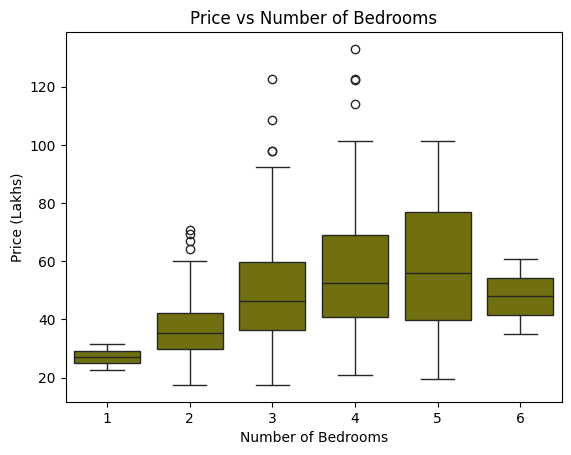

In [ ]:
sns.boxplot(x=df['number of bedrooms'],y=df['prices_in_lakhs'],color='olive')
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Box Plot (Price vs Number of Bedrooms):**

	•	The median house price increases as the number of bedrooms increases from 1 to 5, indicating a strong positive relationship.
	•	1-bedroom houses have the lowest prices and least variability.
	•	3–5 bedroom houses show higher medians and wider spreads, reflecting greater diversity in size, location, and amenities.
	•	The median price for 6-bedroom houses appears slightly lower or stable compared to 5-bedroom houses, likely due to a small sample size.
	•	High-price outliers are most common in houses with 4 and 5 bedrooms, suggesting luxury homes in these categories.

**Overall Insight:**
The number of bedrooms is a key driver of house prices, but at very high bedroom counts, the relationship may weaken due to limited data and variability in property types.

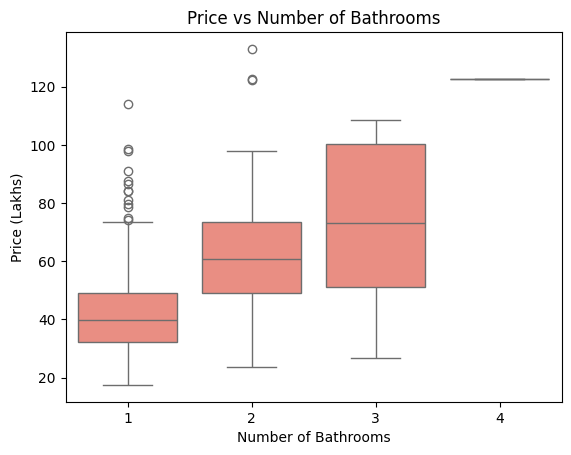

In [ ]:
sns.boxplot(x=df['number of bathrooms'],y=df['prices_in_lakhs'],color='salmon')
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Box Plot (Price vs Number of Bathrooms):**

	•	The median house price increases clearly as the number of bathrooms increases from 1 to 4.
	•	Houses with 1 bathroom have the lowest prices and a relatively tighter distribution.
	•	2-bathroom houses show a substantial jump in median price and greater variability.
	•	3-bathroom houses have even higher median prices and a wider spread, indicating premium properties.
	•	Houses with 4 bathrooms appear at the highest price level, though this category likely has very few observations.

**Overall Insight:**
The number of bathrooms is a strong indicator of house value. More bathrooms generally signal larger, more luxurious homes, leading to significantly higher prices, especially beyond two bathrooms.

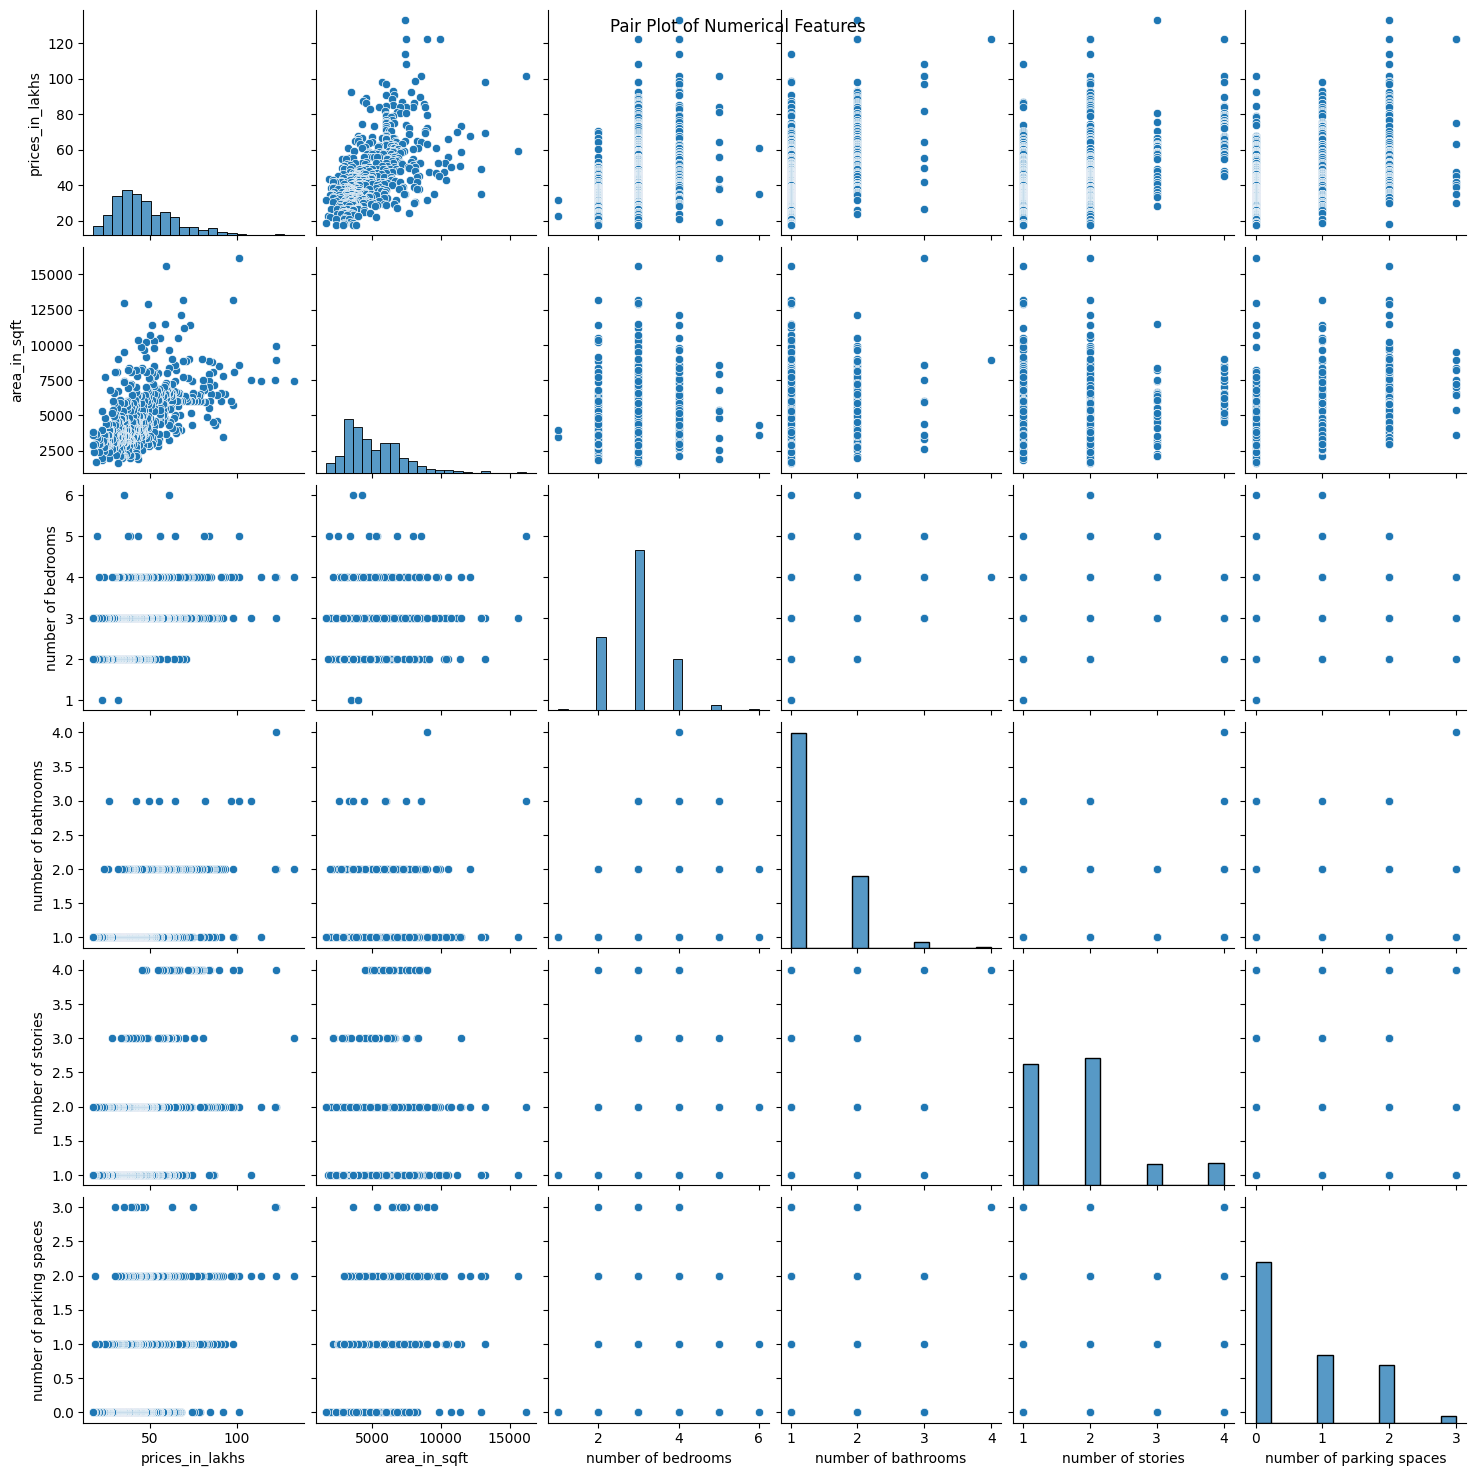

In [ ]:
sns.pairplot(df[['prices_in_lakhs','area_in_sqft','number of bedrooms','number of bathrooms','number of stories','number of parking spaces']])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

**Interpretation of the Pair Plot (Numerical Features):**

	•	Price vs Area: A clear positive relationship is visible—larger houses generally have higher prices, though there is some spread due to other influencing factors.
	•	Price vs Bedrooms / Bathrooms / Stories / Parking: Prices tend to increase as these features increase, confirming they are important drivers of house value. Bathrooms and stories show a stronger upward pattern than bedrooms and parking.
	•	Area vs Other Features: Larger areas are often associated with more bedrooms, bathrooms, stories, and parking, but the relationships are moderate rather than strong, indicating design variability.
	•	Diagonal Distributions:
	•	Prices and area are right-skewed, with most values in the mid-range and a few high-end outliers.
	•	Bedrooms, bathrooms, stories, and parking are discrete and concentrated at lower values, showing most houses are modest in size and features.
	•	Outliers: High-priced and large-area houses stand out across multiple plots, representing luxury properties.

**Overall Insight:**
The pair plot confirms that size-related and structural features jointly influence house prices, with no single factor fully explaining price variation. The relationships are mostly positive but moderate, suggesting a multifactor-driven housing market rather than dependence on one dominant variable.

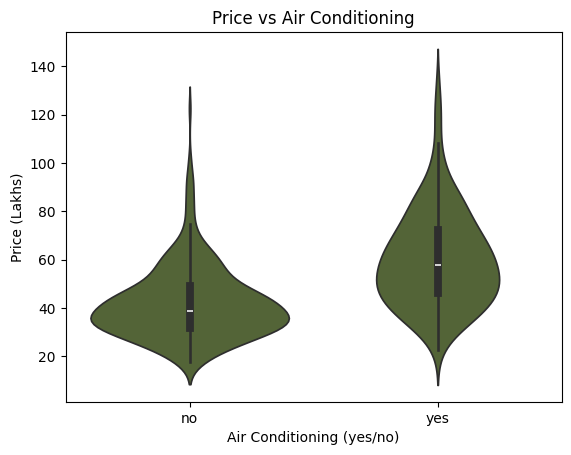

In [ ]:
sns.violinplot(x='air_conditioning', y='prices_in_lakhs', data=df,color='darkolivegreen')
plt.title('Price vs Air Conditioning')
plt.xlabel('Air Conditioning (yes/no)')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Air Conditioning):**

	•	Houses with air conditioning show a higher central price range, with the bulk of prices concentrated around 45–65 lakhs.
	•	Houses without air conditioning are mostly concentrated in a lower price range, around 30–45 lakhs.
	•	The violin for AC = yes is wider and extends higher, indicating greater variability and more high-priced houses.
	•	The presence of a longer upper tail for AC-equipped houses highlights luxury properties that almost always include air conditioning.

**Overall Insight:**
Air conditioning is strongly associated with higher and more variable house prices, reinforcing its role as a premium amenity in the housing market.

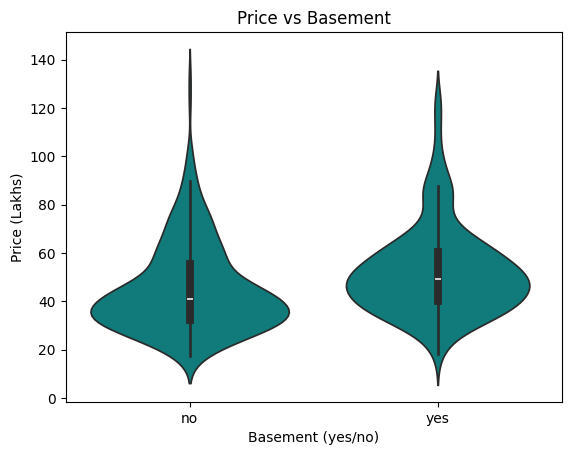

In [ ]:
sns.violinplot(data=df,x='basement_availability',y='prices_in_lakhs',color='darkcyan')
plt.title('Price vs Basement')
plt.xlabel('Basement (yes/no)')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Basement):**

	•	Houses with a basement have a higher central price range, with prices mainly concentrated around 40–60 lakhs.
	•	Houses without a basement are concentrated at a lower price range, typically around 30–45 lakhs.
	•	The violin for basement = yes extends higher, indicating more high-priced houses in this category.
	•	Greater width in the mid-to-upper range for basement houses shows higher price variability, often linked to larger or premium homes.

**Overall Insight:**
Basement availability is associated with higher house prices and greater price variation, reinforcing its role as a value-adding feature in the housing market.

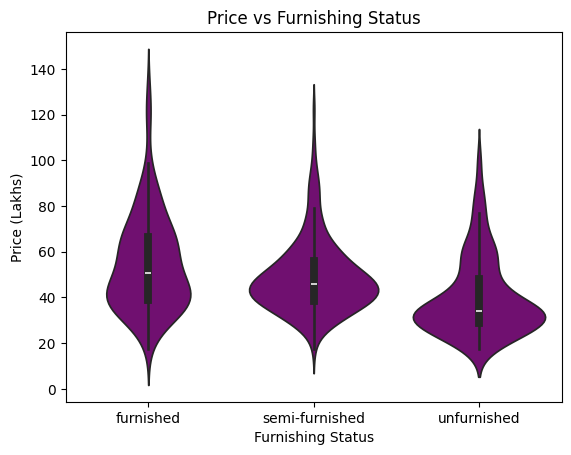

In [ ]:
sns.violinplot(x='furnishing_status',y='prices_in_lakhs',data=df,color='purple')
plt.title('Price vs Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Furnishing Status):**

	•	Fully furnished houses have the highest central price range, with prices commonly concentrated around 45–65 lakhs.
	•	Semi-furnished houses fall in a moderate price range, mostly between 40–55 lakhs.
	•	Unfurnished houses are concentrated at a lower price range, typically around 25–40 lakhs.
	•	The furnished category shows a longer upper tail, indicating the presence of high-end luxury homes.

**Overall Insight:**
Furnishing status strongly influences house prices. Better-furnished homes command higher and more variable prices, while unfurnished houses are generally more affordable.

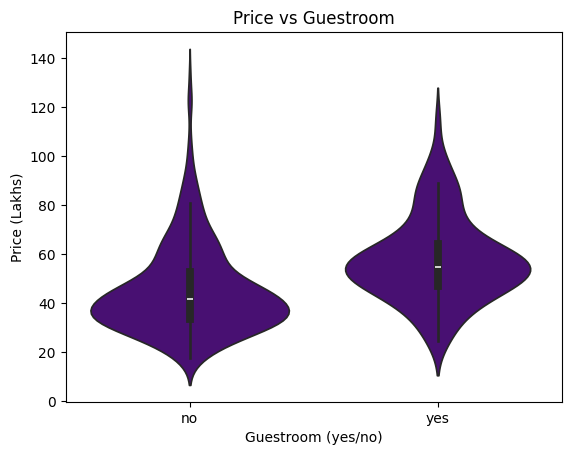

In [ ]:
sns.violinplot(x='guestroom',y='prices_in_lakhs',data=df,color='indigo')
plt.title('Price vs Guestroom')
plt.xlabel('Guestroom (yes/no)')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Guestroom):**

	•	Houses with a guestroom have a higher central price range, with most prices concentrated around 50–65 lakhs.
	•	Houses without a guestroom are mostly concentrated in a lower price range, around 30–45 lakhs.
	•	The distribution for guestroom-equipped houses extends higher, indicating the presence of premium and luxury properties.
	•	Price variability is greater when a guestroom is present, suggesting this feature is more common in higher-end homes.

**Overall Insight:**
Guestroom availability is associated with higher and more variable house prices, reinforcing its role as a premium feature in residential properties.

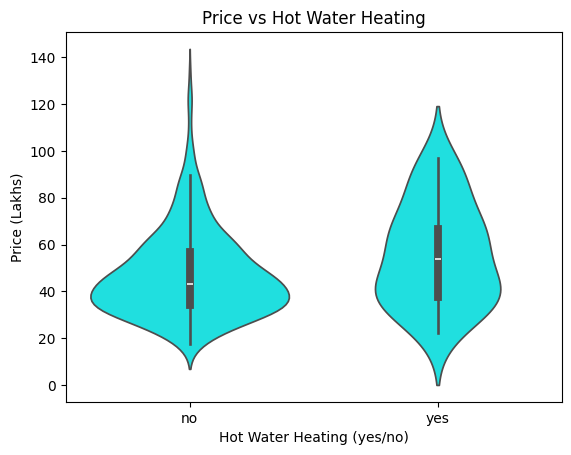

In [ ]:
sns.violinplot(x='hot_water_heating',y='prices_in_lakhs',data=df,color='cyan')
plt.title('Price vs Hot Water Heating')
plt.xlabel('Hot Water Heating (yes/no)')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Hot Water Heating):**

	•	Houses with hot water heating show a higher central price level, with most prices concentrated in the 45–65 lakhs range.
	•	Houses without hot water heating are mainly clustered in a lower price band, around 30–45 lakhs.
	•	The distribution for the “yes” category stretches further upward, indicating more high-priced and premium houses.
	•	The wider shape for houses with hot water heating suggests greater variability in prices, often linked to better amenities and overall quality.

**Overall Insight:**
Hot water heating is associated with higher and more varied house prices, reinforcing its role as a premium feature in the housing market.

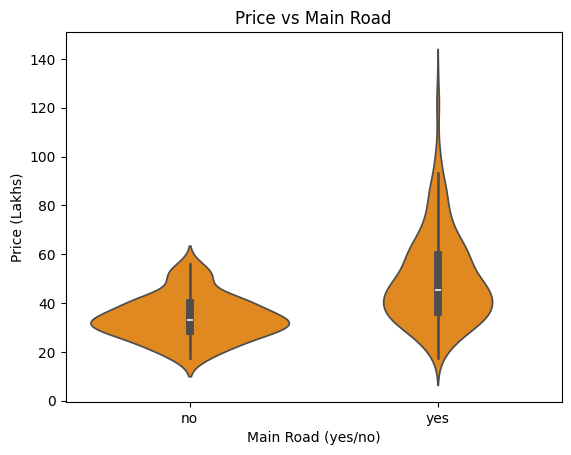

In [ ]:
sns.violinplot(x='main_road_access',y='prices_in_lakhs',data=df,color='darkorange')
plt.title('Price vs Main Road')
plt.xlabel('Main Road (yes/no)')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Main Road Access):**

	•	Houses with main road access have a higher central price range, with most prices concentrated around 40–60 lakhs.
	•	Houses without main road access are clustered at a lower price range, mainly around 25–40 lakhs.
	•	The distribution for main-road houses extends much higher, indicating the presence of high-priced and premium properties.
	•	Greater spread in the “yes” category reflects higher price variability, likely due to differences in location quality and commercial potential.

**Overall Insight:**
Main road access is strongly associated with higher and more variable house prices, highlighting location and connectivity as critical drivers of real estate value.

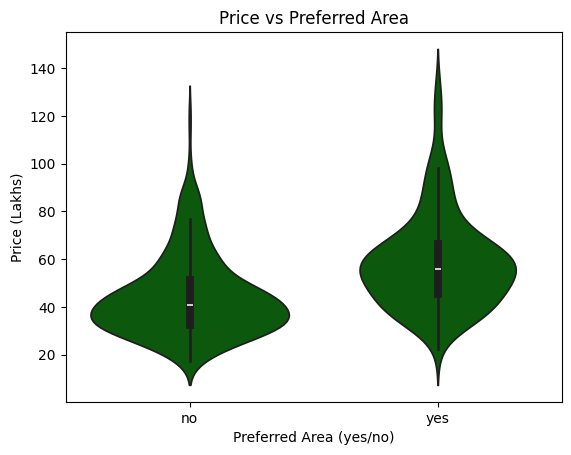

In [ ]:
sns.violinplot(x='preferred_area',y='prices_in_lakhs',data=df,color='darkgreen')
plt.title('Price vs Preferred Area')
plt.xlabel('Preferred Area (yes/no)')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Preferred Area):**

	•	Houses located in preferred areas have a higher central price range, with most prices concentrated around 50–65 lakhs.
	•	Houses not in preferred areas are mainly clustered in a lower price range, typically around 30–45 lakhs.
	•	The distribution for preferred-area houses extends further upward, showing the presence of premium and luxury properties.
	•	Greater spread in the “yes” category indicates higher price variability, reflecting differences in neighborhood desirability and amenities.

**Overall Insight:**
Being in a preferred area is strongly associated with higher and more variable house prices, reinforcing location as one of the most influential factors in real estate valuation.

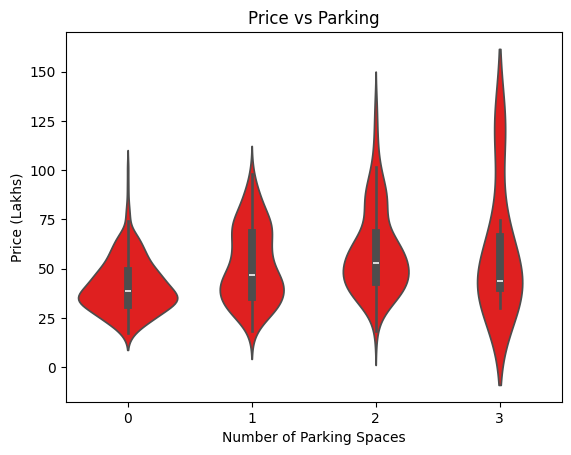

In [ ]:
sns.violinplot(x='number of parking spaces',y='prices_in_lakhs',data=df,color='red')
plt.title('Price vs Parking')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Parking Spaces):**

	•	Houses with 0 parking spaces are concentrated in the lower price range (around 25–45 lakhs).
	•	As the number of parking spaces increases from 1 to 2, the central price level shifts upward, indicating higher-valued properties.
	•	Houses with 2 parking spaces show the highest concentration of mid-to-high prices, suggesting a strong premium.
	•	For 3 parking spaces, prices remain high but show greater variability, likely due to a smaller number of houses in this category.
	•	The upper tails for 2 and 3 parking spaces indicate the presence of luxury homes.

**Overall Insight:**
Parking availability positively influences house prices, with the strongest impact observed up to 2 parking spaces. Beyond that, prices remain high but become more variable, suggesting diminishing returns or limited data.

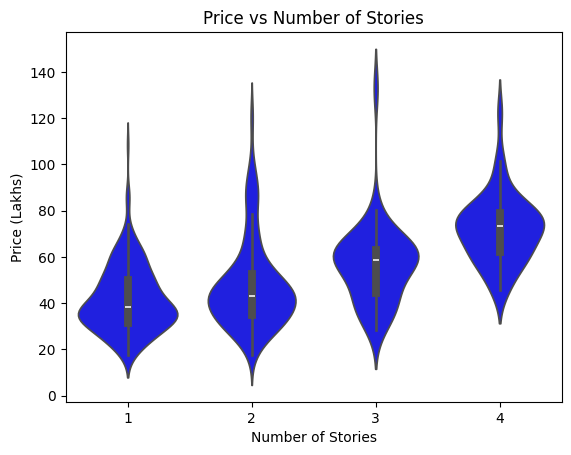

In [ ]:
sns.violinplot(x='number of stories',y='prices_in_lakhs',data=df,color='blue')
plt.title('Price vs Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Number of Stories):**

	•	Houses with 1 storey are concentrated in the lower price range, mainly around 30–45 lakhs.
	•	2-storey houses show a moderate increase in prices, with most values around 40–55 lakhs.
	•	3-storey houses have a higher central price range, typically around 50–65 lakhs.
	•	4-storey houses exhibit the highest prices, with a strong concentration around 65–80 lakhs.
	•	The distribution widens as the number of stories increases, indicating greater price variability for taller houses.

**Overall Insight:**
The number of stories has a strong positive relationship with house price. Taller houses are generally more expensive and more diverse in pricing, reflecting increased space, construction cost, and premium positioning.

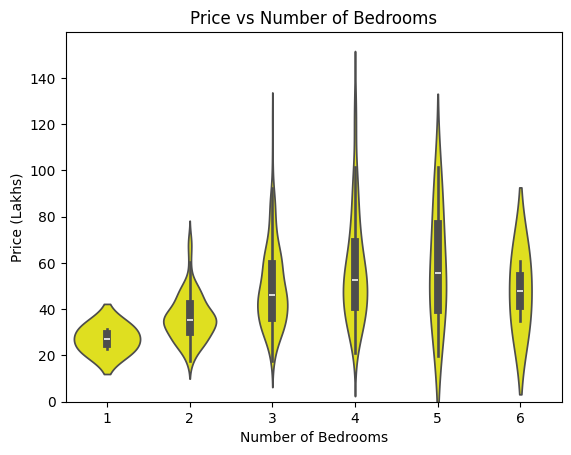

In [ ]:
sns.violinplot(x='number of bedrooms',y='prices_in_lakhs',data=df,color='yellow')
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (Lakhs)')
plt.ylim(0,None)
plt.show()

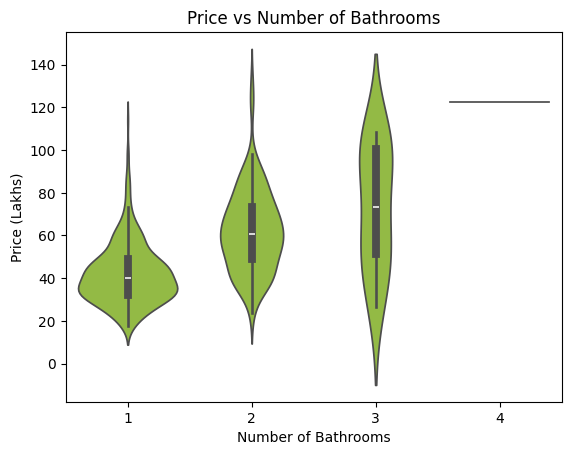

In [ ]:
sns.violinplot(x='number of bathrooms',y='prices_in_lakhs',data=df,color='yellowgreen')
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Violin Plot (Price vs Number of Bedrooms):**

	•	1-bedroom houses are concentrated in the lowest price range, typically around 20–30 lakhs.
	•	Prices increase steadily from 2 to 5 bedrooms, with higher central values and wider distributions.
	•	4–5 bedroom houses show the highest price concentrations, indicating premium properties.
	•	6-bedroom houses remain high-priced but show greater variability, likely due to a smaller number of observations.
	•	The widening violins at higher bedroom counts indicate increasing price dispersion.

**Overall Insight:**
The number of bedrooms has a strong positive influence on house prices. Larger homes tend to be more expensive and show greater variability in pricing, reflecting differences in size, location, and luxury level.

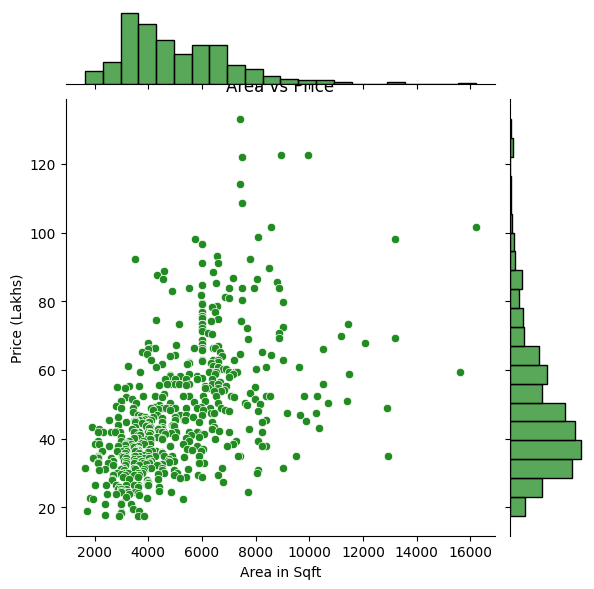

In [ ]:
sns.jointplot(x='area_in_sqft', y='prices_in_lakhs', data=df, kind='scatter',color='forestgreen')
plt.title('Area vs Price')
plt.xlabel('Area in Sqft')
plt.ylabel('Price (Lakhs)')
plt.show()

**Interpretation of the Joint Plot (Area vs Price):**

	•	The scatter plot shows a clear positive relationship between area (sqft) and price (lakhs)—larger houses generally cost more.
	•	Most houses are concentrated in the 3,000–6,000 sqft range with prices roughly between 30–60 lakhs, indicating the core market segment.
	•	The marginal histograms show both area and price distributions are right-skewed, with a few very large and very expensive houses.
	•	Several points with large area but comparatively moderate prices and vice versa indicate that area alone does not fully determine price.
	•	A few high-area, high-price outliers represent luxury properties.

**Overall Insight:**
House price increases with size, but the spread in prices for similar areas highlights the influence of other factors such as location, amenities, furnishing, and road access.

**Conclusion:**
This project conducted a comprehensive exploratory data analysis (EDA) to understand the key factors influencing housing prices using a structured set of visualizations and statistical techniques. The analysis revealed that housing prices are not driven by a single attribute but are influenced by a combination of structural features, amenities, and location-related factors.

Among numerical features, area and number of bathrooms emerged as the strongest drivers of price, indicating that larger homes with better facilities command higher market value. Structural attributes such as number of stories, bedrooms, and parking availability also showed a positive relationship with price, though with diminishing returns at higher values due to limited data points.

Categorical feature analysis demonstrated that houses located in preferred areas or near main roads, as well as those equipped with air conditioning, basements, guest rooms, and hot water heating, tend to be priced significantly higher. Additionally, furnishing status plays an important role, with fully furnished houses commanding the highest prices, followed by semi-furnished and unfurnished houses.

Correlation analysis confirmed that area, bathrooms, stories, and parking have moderate to strong relationships with price, while low multicollinearity among features indicates that each factor contributes independently to price variation. Outlier analysis highlighted the presence of luxury properties, which, while fewer in number, significantly extend the upper range of prices.

Overall, this project provides a clear, data-driven understanding of housing price dynamics, enabling buyers, sellers, and real-estate analysts to make informed decisions based on observable patterns rather than assumptions.


**Q1. What are the main determinants of housing prices in this dataset?**

A1. The main determinants are:

	•	Area
	•	Number of bathrooms
	•	Location factors (preferred area, main road access)
	•	Structural features (stories, bedrooms)
	•	Amenities (air conditioning, parking, basement, guestroom)
	•	Furnishing status

Among these, area, bathrooms, and location-related features have the strongest influence on price.




**Q2. How do structural attributes such as area, bedrooms, and bathrooms affect pricing?**

A2.

	•	Area shows a strong positive relationship with price—larger houses generally cost more.
	•	Bathrooms have a stronger influence than bedrooms, with prices increasing significantly as bathroom count increases.
	•	Bedrooms contribute positively to price, but the effect is more moderate and stabilizes at higher counts.
	•	Stories also increase property value, with multi-storey houses typically being more expensive.

**Q3. Do amenities like air conditioning, basement, and parking significantly increase property value?**

A3. Yes, amenities like air conditioning, basement, and parking consistently show higher average and median prices. However, the impact tends to plateau beyond a certain level, especially for parking, due to limited observations in higher categories.

**Q4. Is there a price difference between furnished, semi-furnished, and unfurnished houses?**

A4. Yes, there is a clear price hierarchy:

	•	Fully furnished houses have the highest prices
	•	Semi-furnished houses fall in the mid-range
	•	Unfurnished houses are the least expensive

This indicates that furnishing status is a significant value-adding factor, especially for buyers seeking ready-to-move-in properties.


**Q5. What relationships or correlations exist among the dataset features?**

A5.

	•	Price is moderately to strongly correlated with area, bathrooms, stories, and parking.
	•	Structural features such as bedrooms, bathrooms, and stories are moderately correlated with each other.
	•	No extremely high correlations were found, indicating low multicollinearity and independent contribution of features to price.

**Q6. Can visual trends help identify patterns useful for stakeholders such as buyers, sellers, and real-estate analysts?**

A6. Yes. Visual trends clearly highlight:

• Which features contribute most to higher prices

• The difference between mid-range and luxury properties

• How amenities and location influence valuation

• Market concentration around 2–3 bedroom, 1–2 bathroom houses

These insights help:

 • Buyers identify value-for-money properties

 • Sellers price houses competitively

 • Analysts understand market behavior and segmentation